### Business problem: To predict  whether the customer will fall under default or not.

# Chapter 1 : EDA

## 1.1 Data Understanding

In [1]:
# working directry details
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir("D:\\EXCELR_SOLUTIONS\\PROJECT\\Bank_project_excelR")
os.getcwd()

'D:\\EXCELR_SOLUTIONS\\PROJECT\\Bank_project_excelR'

In [2]:
# Importing bank data
import numpy as np
import pandas as pd
data = 'bank_final.csv'
bank = pd.read_csv(data)

In [3]:
bank.shape

(149999, 26)

In [4]:
bank.head(4)

,Name,City,State,Zip,Bank,BankState,CCSC,ApprovalDate,ApprovalFY,Term,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"


###### Finding total number of duplicate rows and deleting those.

In [5]:
# Total duplicate raws
bank.duplicated().sum()

15

In [6]:
# duplicate rows are;
bank.loc[bank.duplicated(keep='last'),:]

,Name,City,State,Zip,Bank,BankState,CCSC,ApprovalDate,ApprovalFY,Term,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
240,REYNOLDS H20 PLUS,WEST READING,PA,19611,WELLS FARGO BANK NATL ASSOC,PA,0,04-Dec-97,1998,60,...,0,N,NaN,28-Feb-98,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
35622,"ARCHITECTURAL ORNAMENTS, INC.",KANSAS CITY,MO,64126,"UMB BANK, NATIONAL ASSOCIATION",MO,327331,22-May-97,1997,12,...,N,N,NaN,31-Jan-98,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$40,000.00"
43040,NETEC,CHELSEA,MA,2150,STATE STREET BK & TR CO,MA,0,10-Jun-97,1997,5,...,N,N,NaN,31-Oct-97,"$46,771.00",$0.00,P I F,$0.00,"$46,771.00","$35,078.00"
61200,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,...,N,N,NaN,28-Feb-06,"$4,000.00",$0.00,P I F,$0.00,"$4,000.00","$2,000.00"
61201,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,...,N,N,NaN,28-Feb-06,"$4,000.00",$0.00,P I F,$0.00,"$4,000.00","$2,000.00"
61203,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,...,N,N,NaN,28-Feb-06,"$4,000.00",$0.00,P I F,$0.00,"$4,000.00","$2,000.00"
61211,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,...,N,N,NaN,28-Feb-06,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
61216,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,...,N,N,NaN,28-Feb-06,"$3,000.00",$0.00,NaN,$0.00,"$3,000.00","$1,500.00"
61219,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,...,N,N,NaN,28-Feb-06,"$4,000.00",$0.00,P I F,$0.00,"$4,000.00","$2,000.00"
61220,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,...,N,N,NaN,28-Feb-06,"$3,000.00",$0.00,NaN,$0.00,"$3,000.00","$1,500.00"


In [7]:
# Droping duplicated Raws
bank.drop_duplicates(keep='last',inplace=True)

In [8]:
#Reset index
bank.reset_index(inplace = True)
del bank['index']

In [9]:
bank.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'CCSC',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

##### VARIABLE DESCRIPTIONS:  
1. Name          : Name of the Borrower
2. City          : Borrower City
3. State         : Borrower State
4. Zip           : Borrower Zip code
5. Bank          : Bank Name
6. Bank State    : Bank State
7. CCSC          : Country classification system code
8. Approval Date : Date Small Business Administration Commitment Issued
9. Approval FY   : Fiscal Year of Commitment
10. Term          : Loan term in months
11. No Emp        : Number of Business Employees
12. New Exist     : 1 = Existing Business, 2 = New Business
13. Create Job    : Number of jobs created
14. Retained Job  : Number of jobs retained
15. Franchise Code: Franchise Code 00000 or 00001 = No Franchise
16. Urban Rural   : 1= Urban, 2= Rural, 0 = Undefined
17. RevLineCr     : Revolving Line of Credit : Y = Yes, N=No
18. Low Doc       : LowDoc Loan Program: Y = Yes, N = No
19. ChgOff Date   : The date when a loan is declared to be in default
20. Disbursement Date : Disbursement Date
21. Disbursement Gross: Amount Disbursed
22. Balance Gross     : Gross amount outstanding
23. MIS_Status        : Loan Status CHGOFF(high risk)—likely to default on the loan (i.e., be charged off/failure to pay in                            full), P/F( lower risk)—likely to pay off the loan in full
24. Chg Off Prin  Gr  : Charged-off Amount
25. GrAppv            : Gross Amount of Loan Approved by Bank
26. SBA_Appv          : Small Business Administration’s Guaranteed Amount of Approved Loan

## 1.2 Data Cleaning

In [10]:
#Removing the special charecter ($ sign) from dataset using regular expression
bank.replace('\$','',regex=True,inplace=True)

### Considering all categorical variables for dropping unnecessary variables.
 For finding the total number of unique values in categorical variables and to identify the presence of garbages and cosidering the garbages as NaN .

###### Variable : Name ( Borrower Name)

In [11]:
print(bank.Name.value_counts())
print( )
print('Total number of Unique values : ',bank.Name.value_counts().shape[0])

SUBWAY                            78
SCHLOTZSKY'S DELI                 39
QUIZNO'S CLASSIC SUBS             37
DOMINO'S PIZZA                    36
DAIRY QUEEN                       32
                                  ..
Atlanta Broadcast Institute, I     1
Joseph's Trend Inc                 1
TAE JUN RYU DBA TAE YOUNG TECH     1
THE PATTIE SHACK                   1
Caterinos Bakery                   1
Name: Name, Length: 140883, dtype: int64

Total number of Unique values :  140883


###### Variable : City (Borrower City)

In [12]:
print(bank.City.value_counts())
print( )
print('Total number of Unique values : ',bank.City.value_counts().shape[0])

LOS ANGELES    1902
NEW YORK       1582
MIAMI          1515
CHICAGO        1401
HOUSTON        1351
               ... 
Pine Bush         1
TRIANGLE          1
S. HOLLAND        1
Port Isabel       1
Newell            1
Name: City, Length: 15792, dtype: int64

Total number of Unique values :  15792


###### Variable : State ( Borrower state)

In [13]:
print(bank.State.value_counts())
print( )
print('Total number of Unique values : ',bank.State.value_counts().shape[0])

CA    19306
NY    12235
TX     9822
FL     9269
OH     7560
PA     6280
IL     6131
MI     5171
MA     5032
NJ     4555
GA     4201
WA     3444
UT     3079
WI     3041
AZ     3029
CO     2959
MN     2848
MD     2803
MO     2772
NC     2719
IN     2708
VA     2431
CT     2366
NH     1930
RI     1583
OR     1550
TN     1503
OK     1409
KY     1344
ID     1330
KS     1314
NV     1237
AL     1194
IA     1167
LA     1070
MS     1032
SC     1031
MT      934
ME      867
AR      833
VT      794
NM      670
NE      550
WV      494
DE      458
ND      454
HI      390
SD      331
WY      283
AK      235
DC      234
Name: State, dtype: int64

Total number of Unique values :  51


###### Variable : Zip ( Zip Code )

In [14]:
print(bank.Zip.value_counts())
print( )
print('Total number of Unique values : ',bank.Zip.value_counts().shape[0])

10001    201
33166    198
90015    176
90010    172
48126    171
        ... 
32813      1
8249       1
92560      1
43432      1
14139      1
Name: Zip, Length: 19372, dtype: int64

Total number of Unique values :  19372


###### Variable : Bank ( Bank Name)

In [15]:
print(bank.Bank.value_counts())
print( )
print('Total number of Unique values : ',bank.Bank.value_counts().shape[0])

BANK OF AMERICA NATL ASSOC        28023
CITIZENS BANK NATL ASSOC          13051
CAPITAL ONE NATL ASSOC            10611
JPMORGAN CHASE BANK NATL ASSOC    10381
WELLS FARGO BANK NATL ASSOC        6372
                                  ...  
YAMPA VALLEY BANK                     1
PLAZA PARK STATE BANK                 1
GRAPELAND STATE BANK                  1
THE EDGARTOWN NATIONAL BANK           1
SERVISFIRST BANK                      1
Name: Bank, Length: 2932, dtype: int64

Total number of Unique values :  2932


###### Variable : BankState ( Bank State)

In [16]:
print(bank.BankState.value_counts())
print( )
print('Total number of Unique values : ',bank.BankState.value_counts().shape[0])

NC    26847
RI    14730
IL    12672
CA    12441
VA    11564
OH    10049
NY     6282
DE     5555
SD     4943
TX     4779
UT     3057
PA     2901
FL     2878
OR     1960
WI     1932
MN     1847
GA     1840
MO     1618
MA     1471
MD     1354
NJ     1103
CT     1043
AL     1035
CO     1014
WA      952
MI      898
IA      859
IN      790
MT      782
KS      774
OK      768
SC      716
DC      701
MS      683
NH      631
AR      606
KY      563
VT      516
NV      483
TN      478
LA      436
ND      421
AZ      414
NM      409
ID      400
NE      390
ME      357
WV      290
HI      285
WY      201
AK       73
PR       45
Name: BankState, dtype: int64

Total number of Unique values :  52


###### Variable : CCSC ( Country classification system code )

In [17]:
print(bank.CCSC.value_counts())
print( )
print('Total number of Unique values : ',bank.CCSC.value_counts().shape[0])

0         31835
722110     3394
722211     2888
811111     2623
561730     2167
          ...  
336391        1
221111        1
114119        1
331311        1
421220        1
Name: CCSC, Length: 1185, dtype: int64

Total number of Unique values :  1185


###### Variable : ApprovalDate ( Approval Date)

In [18]:
print(bank.ApprovalDate.value_counts())
print( )
print('Total number of Unique values : ',bank.ApprovalDate.value_counts().shape[0])

30-Sep-97    466
17-Mar-06    425
24-Mar-06    422
01-Apr-97    418
31-Mar-06    412
            ... 
09-Oct-81      1
26-Feb-82      1
30-Jan-79      1
03-Jun-84      1
20-May-82      1
Name: ApprovalDate, Length: 2548, dtype: int64

Total number of Unique values :  2548


###### Variable : ApprovalFY ( Approval Financial Year)

In [19]:
print(bank.ApprovalFY.value_counts())
print( )
print('Total number of Unique values : ',bank.ApprovalFY.value_counts().shape[0])

2006    55357
2005    33539
1997    23836
1998    22735
2004     5552
2007     3536
1984     1993
1983     1608
1982      529
1981      407
2003      259
1985      151
1980      138
2001      100
1979       99
1999       43
1978       38
2000       34
1972       23
1973        4
1966        1
1965        1
1962        1
Name: ApprovalFY, dtype: int64

Total number of Unique values :  23


###### Variable : NewExist

In [20]:
print(bank.NewExist.value_counts())
print( )
print('Total number of Unique values : ',bank.NewExist.value_counts().shape[0])

1    101809
2     48047
0       128
Name: NewExist, dtype: int64

Total number of Unique values :  3


In [21]:
# Replacing 0 with Nan 
bank['NewExist'].replace(0,np.NaN,inplace = True)
bank['NewExist'].value_counts(dropna=False)

1.0    101809
2.0     48047
NaN       128
Name: NewExist, dtype: int64

###### Variable : FranchiseCode

In [22]:
print(bank.FranchiseCode.value_counts())
print( )
print('Total number of Unique values : ',bank.FranchiseCode.value_counts().shape[0])

1        81167
0        63557
78760      347
68020      147
50564      115
         ...  
10546        1
85150        1
9651         1
40740        1
53290        1
Name: FranchiseCode, Length: 1034, dtype: int64

Total number of Unique values :  1034


###### Replacing other values in FranchiseCode variable with NaN

In [23]:
# Definition for replacing;
def change(num):
    if num > 1:
        return 2
    if num ==0:
        return 0
    if num ==1:
        return 1
bank['FranchiseCode'] = bank['FranchiseCode'].apply(change)
bank['FranchiseCode'] = bank['FranchiseCode'].replace(2,np.NaN)
bank.FranchiseCode.value_counts(dropna = False)

1.0    81167
0.0    63557
NaN     5260
Name: FranchiseCode, dtype: int64

###### Variable : UrbanRural

In [24]:
print(bank.UrbanRural.value_counts())
print( )
print('Total number of Unique values : ',bank.UrbanRural.value_counts().shape[0])

1    81796
0    51504
2    16684
Name: UrbanRural, dtype: int64

Total number of Unique values :  3


###### Variable : RevLineCr (Revolving Line of Credit)

In [25]:
print(bank.RevLineCr.value_counts())
print( )
print('Total number of Unique values : ',bank.RevLineCr.value_counts().shape[0])

N    71598
Y    49881
0    23657
T     4819
1        3
`        2
,        1
Name: RevLineCr, dtype: int64

Total number of Unique values :  7


In [26]:
# replacing the garbages and Numeric values in 'RevLineCr' to NaN
import numpy as np
bank['RevLineCr'] = bank['RevLineCr'].replace([',','`','0','1','T'],np.NaN)
bank['RevLineCr'].value_counts(dropna= False)

N      71598
Y      49881
NaN    28505
Name: RevLineCr, dtype: int64

###### Variable : LowDoc 

In [27]:
print(bank.LowDoc.value_counts())
print( )
print('Total number of Unique values : ',bank.LowDoc.value_counts().shape[0])

N    137856
Y     12044
C        83
1         1
Name: LowDoc, dtype: int64

Total number of Unique values :  4


In [28]:
# replacing the letter and Numeric values in 'LowDoc' to NaN
import numpy as np
bank['LowDoc'] = bank['LowDoc'].replace(['1','C'],np.NaN)
bank['LowDoc'].value_counts(dropna= False)

N      137856
Y       12044
NaN        84
Name: LowDoc, dtype: int64

###### Variable : ChgOffDate

In [29]:
print(bank.ChgOffDate.value_counts())
print( )
print('Total number of Unique values : ',bank.ChgOffDate.value_counts().shape[0])

13-Mar-10    201
30-Jan-10    183
20-Feb-10    175
06-Feb-10    158
06-Mar-10    148
            ... 
03-Apr-01      1
15-Dec-98      1
08-Oct-96      1
05-Apr-93      1
15-Aug-89      1
Name: ChgOffDate, Length: 4234, dtype: int64

Total number of Unique values :  4234


###### Variable : DisbursementDate

In [30]:
print(bank.DisbursementDate.value_counts())
print( )
print('Total number of Unique values : ',bank.DisbursementDate.value_counts().shape[0])

31-May-06    6220
31-Mar-06    6039
30-Apr-06    5848
30-Jun-06    5262
28-Feb-06    4893
             ... 
20-May-82       1
10-Jul-80       1
01-May-08       1
23-Mar-83       1
06-Oct-98       1
Name: DisbursementDate, Length: 1962, dtype: int64

Total number of Unique values :  1962


###### Variable : MIS_Status

In [31]:
print(bank.MIS_Status.value_counts())
print( )
print('Total number of Unique values : ',bank.MIS_Status.value_counts().shape[0])

P I F     110110
CHGOFF     39008
Name: MIS_Status, dtype: int64

Total number of Unique values :  2


###### Dropping unnecessary variable columns, because of  large number of binary classification. Not effective for output classification

In [32]:
bank.drop(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState'
           ,'CCSC','ApprovalDate','ApprovalFY','ChgOffDate','DisbursementDate'],axis = 1, inplace=True)
bank.shape

(149984, 15)

### Considering all numeric variables ( Except Categorical Variable)
For identifing presence of garbages and null values

In [33]:
bank.head(5)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,2.0,0,0,1.0,0,N,Y,"60,000.00",0.00,P I F,0.00,"60,000.00","48,000.00"
1,60,2,2.0,0,0,1.0,0,N,Y,"40,000.00",0.00,P I F,0.00,"40,000.00","32,000.00"
2,180,7,1.0,0,0,1.0,0,N,N,"287,000.00",0.00,P I F,0.00,"287,000.00","215,250.00"
3,60,2,1.0,0,0,1.0,0,N,Y,"35,000.00",0.00,P I F,0.00,"35,000.00","28,000.00"
4,240,14,1.0,7,7,1.0,0,N,N,"229,000.00",0.00,P I F,0.00,"229,000.00","229,000.00"


In [34]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149984 entries, 0 to 149983
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               149984 non-null  int64  
 1   NoEmp              149984 non-null  int64  
 2   NewExist           149856 non-null  float64
 3   CreateJob          149984 non-null  int64  
 4   RetainedJob        149984 non-null  int64  
 5   FranchiseCode      144724 non-null  float64
 6   UrbanRural         149984 non-null  int64  
 7   RevLineCr          121479 non-null  object 
 8   LowDoc             149900 non-null  object 
 9   DisbursementGross  149984 non-null  object 
 10  BalanceGross       149984 non-null  object 
 11  MIS_Status         149118 non-null  object 
 12  ChgOffPrinGr       149984 non-null  object 
 13  GrAppv             149984 non-null  object 
 14  SBA_Appv           149984 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 17

In [35]:
#removing comma from variables DisbursementGross, GrAppv and SBA_Appv ( replacing String to integer format)
bank['DisbursementGross'] = bank['DisbursementGross'].apply(lambda x: x.replace(',','').replace(' ',''))
bank['DisbursementGross'] = bank['DisbursementGross'].apply(lambda x: int(x.split(".")[0]))

bank['GrAppv'] = bank['GrAppv'].apply(lambda x: x.replace(',','').replace(' ',''))
bank['GrAppv'] = bank['GrAppv'].apply(lambda x: int(x.split(".")[0]))

bank['SBA_Appv'] = bank['SBA_Appv'].apply(lambda x: x.replace(',','').replace(' ',''))
bank['SBA_Appv'] = bank['SBA_Appv'].apply(lambda x: int(x.split(".")[0]))
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149984 entries, 0 to 149983
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               149984 non-null  int64  
 1   NoEmp              149984 non-null  int64  
 2   NewExist           149856 non-null  float64
 3   CreateJob          149984 non-null  int64  
 4   RetainedJob        149984 non-null  int64  
 5   FranchiseCode      144724 non-null  float64
 6   UrbanRural         149984 non-null  int64  
 7   RevLineCr          121479 non-null  object 
 8   LowDoc             149900 non-null  object 
 9   DisbursementGross  149984 non-null  int64  
 10  BalanceGross       149984 non-null  object 
 11  MIS_Status         149118 non-null  object 
 12  ChgOffPrinGr       149984 non-null  object 
 13  GrAppv             149984 non-null  int64  
 14  SBA_Appv           149984 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 17

###### Considering Variable : Term

In [36]:
print ('Total number of zero values in Term variable :')
bank[bank.Term == 0].shape[0] 

Total number of zero values in Term variable :


202

In [37]:
# Replacing 0 with NaN 
import numpy as np
bank['Term'] = bank['Term'].replace(0,np.NaN)

###### Considering Variable : NoEmp

In [38]:
bank.NoEmp

0          4
1          2
2          7
3          2
4         14
          ..
149979    13
149980     8
149981     4
149982     9
149983     9
Name: NoEmp, Length: 149984, dtype: int64

###### Considering Variable : CreateJob

In [39]:
bank.CreateJob

0         0
1         0
2         0
3         0
4         7
         ..
149979    0
149980    3
149981    2
149982    0
149983    5
Name: CreateJob, Length: 149984, dtype: int64

###### Considering Variable : RetainedJob

In [40]:
bank.RetainedJob

0          0
1          0
2          0
3          0
4          7
          ..
149979    13
149980     5
149981     4
149982     0
149983     9
Name: RetainedJob, Length: 149984, dtype: int64

###### No Issues in these  3 variables;
1. NoEmp
2. CreateJob
3. RetainedJob

###### Considering Variable : DisbursementGross

In [41]:
bank[bank.DisbursementGross == 0].shape[0]

56

In [42]:
# Replacing 0 with NaN
bank['DisbursementGross'] = bank['DisbursementGross'].replace(0,np.NaN)

###### Considering Variable : BalanceGross

In [43]:
bank.BalanceGross

0         0.00 
1         0.00 
2         0.00 
3         0.00 
4         0.00 
          ...  
149979    0.00 
149980    0.00 
149981    0.00 
149982    0.00 
149983    0.00 
Name: BalanceGross, Length: 149984, dtype: object

In [44]:
# BalanceGross in a object data type , so moving through this way;
bank.BalanceGross.value_counts()

0.00           149982
827,875.00          1
12,750.00           1
Name: BalanceGross, dtype: int64

BalanceGross variable include large number of zero. So this variable is not essential for classification, therefore dropping BalanceGross variable

In [45]:
# Droping BalanceGross Variable 
del bank['BalanceGross']

###### Considering Variable : ChgOffPrinGr

In [46]:
bank.ChgOffPrinGr.value_counts()

0.00           109687
10,000.00         956
50,000.00         795
25,000.00         437
100,000.00        400
                ...  
34,003.00           1
8,420.00            1
48,960.00           1
9,507.00            1
49,636.00           1
Name: ChgOffPrinGr, Length: 28116, dtype: int64

ChgOffPrinGr include large number of zero. So this variable is not essential for classification, therefore dropping ChgOffPrinGr

In [47]:
# Droping ChgOffPrinGr
del bank['ChgOffPrinGr']

###### Considering Variable : GrAppv

In [48]:
bank.GrAppv

0          60000
1          40000
2         287000
3          35000
4         229000
           ...  
149979    100000
149980     20000
149981    100000
149982     25000
149983    708000
Name: GrAppv, Length: 149984, dtype: int64

In [49]:
bank[bank['GrAppv'] == 0].shape[0]

0

###### Considering Variable : SBA_Appv

In [50]:
bank.SBA_Appv

0          48000
1          32000
2         215250
3          28000
4         229000
           ...  
149979     50000
149980     10000
149981     50000
149982     12500
149983    708000
Name: SBA_Appv, Length: 149984, dtype: int64

In [51]:
bank[bank['SBA_Appv'] == 0].shape[0]

0

GrAppv and SBA_Appv Variables are fine

In [52]:
print ('After Data Cleaning        :')
print ('Total number of Variables  = ',bank.shape[1] )
print ('Number of Rows             = ',bank.shape[0])

After Data Cleaning        :
Total number of Variables  =  13
Number of Rows             =  149984


## 1.2.1  Handling of Missing Values and Imputation Procedure

### Total number of Null Values

In [53]:
print ('Total Null values :')
bank.isnull().sum()

Total Null values :


Term                   202
NoEmp                    0
NewExist               128
CreateJob                0
RetainedJob              0
FranchiseCode         5260
UrbanRural               0
RevLineCr            28505
LowDoc                  84
DisbursementGross       56
MIS_Status             866
GrAppv                   0
SBA_Appv                 0
dtype: int64

###### Deleting all rows which have NaN values in output variable(MIS_Status). Becouse, the NaN in Output variable will negatively affect the model building ; 

In [54]:
# Deleting NaN values rows from output variable(MIS_Status)
bank = bank.dropna(subset =['MIS_Status'],how ='any')
bank['MIS_Status'].isnull().sum()

0

#### Visualisation of Null Values

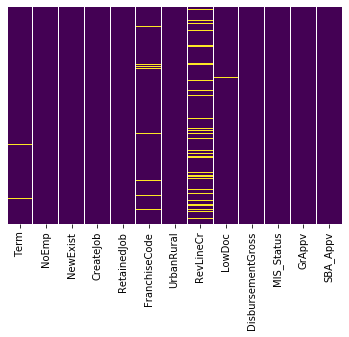

In [57]:
import seaborn as sns
sns.heatmap(bank.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### Droping raws that have null in all these following variables respectively

In [58]:
bank.dropna(subset = ['Term','NewExist','FranchiseCode','RevLineCr','LowDoc'], how = 'all' ,inplace = True)
bank.isnull().sum()

Term                   201
NoEmp                    0
NewExist               126
CreateJob                0
RetainedJob              0
FranchiseCode         5254
UrbanRural               0
RevLineCr            28493
LowDoc                  84
DisbursementGross        0
MIS_Status               0
GrAppv                   0
SBA_Appv                 0
dtype: int64

### Treating NaN value in Term Variable

##### Mean And Median of Term Variable

In [59]:
print ('Mean of Term Variable is   = ',bank['Term'].mean())
print ('Median of Term Variable is = ',bank['Term'].median())

Mean of Term Variable is   =  93.21109745697268
Median of Term Variable is =  84.0


###### Before imputing with Mean or Median, Checking the distribution of Term with Variable UrbanRural

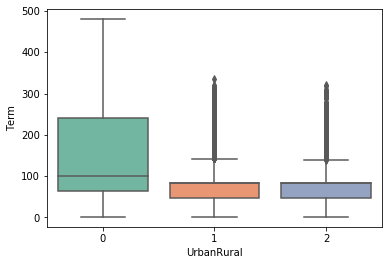

In [66]:
import seaborn as sns
sns.boxplot(x = 'UrbanRural' , y='Term',data = bank,palette= 'Set2')

After categorising Term Variable with UrbanRural variable, here got 3 different median points.

###### Finding these 3 different median value of Term variable and Imputing these median values to the corresponding NaN values in Term;

In [67]:
bank_UrbanRural_0 = bank[bank['UrbanRural'] == 0]
undefined_median_Term = bank_UrbanRural_0['Term'].median()

bank_UrbanRural_1 = bank[bank['UrbanRural'] == 1]
urban_median_Term = bank_UrbanRural_1['Term'].median()

bank_UrbanRural_2 = bank[bank['UrbanRural'] == 2]
rural_median_Term = bank_UrbanRural_2['Term'].median()

In [68]:
# Definition for filling NaN on Term variable with median of Term variable in each category on UrbanRural variable
def impute_Term(cols):
    Term = cols[0]
    UrbanRural = cols[1]
    
    if pd.isnull(Term):
        if UrbanRural == 0:
            return undefined_median_Term
        
        elif UrbanRural == 1:
            return urban_median_Term
        
        else:
            return rural_median_Term
        
    else:
        return Term
    
#applying def
bank['Term'] = bank[['Term','UrbanRural']].apply(impute_Term, axis = 1)

In [69]:
print ('Total Null values :')
bank.isnull().sum()

Total Null values :


Term                     0
NoEmp                    0
NewExist               126
CreateJob                0
RetainedJob              0
FranchiseCode         5254
UrbanRural               0
RevLineCr            28493
LowDoc                  84
DisbursementGross        0
MIS_Status               0
GrAppv                   0
SBA_Appv                 0
dtype: int64

### Treating NaN value in LowDoc

In [70]:
print('Value counts :')
bank['LowDoc'].value_counts(dropna=False)

Value counts :


N      137003
Y       12031
NaN        84
Name: LowDoc, dtype: int64

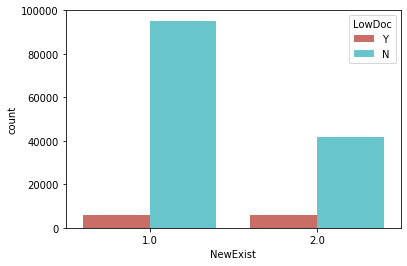

In [71]:
# NewExist countplot
sns.countplot('NewExist', hue='LowDoc',data = bank, palette= 'hls')

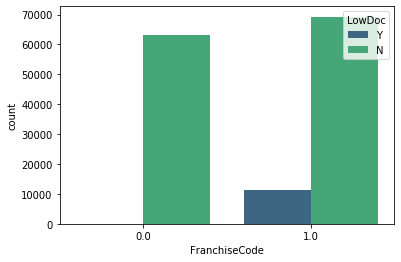

In [72]:
# FranchiseCode countplot
sns.countplot('FranchiseCode', hue='LowDoc',data = bank, palette= 'viridis')

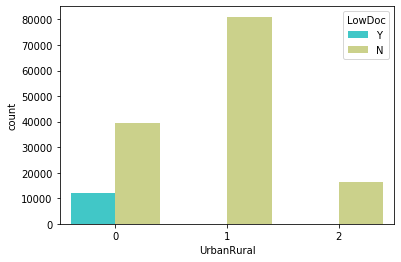

In [73]:
# UrbanRural countplot
sns.countplot('UrbanRural', hue='LowDoc',data = bank, palette= 'rainbow')

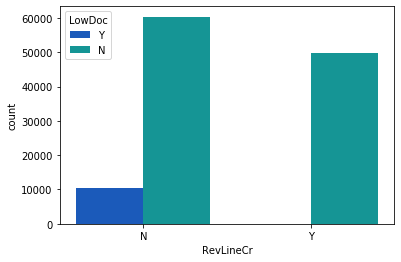

In [74]:
# RevLineCr countplot
sns.countplot('RevLineCr', hue='LowDoc',data = bank, palette= 'winter')

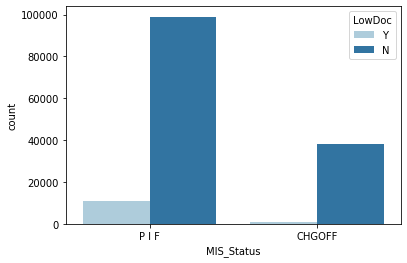

In [75]:
# MIS_Status countplot
sns.countplot('MIS_Status', hue='LowDoc',data = bank, palette= 'Paired')

Based on the Given countplots, considering UrbanRural countplot for Imputation purose. Becouse, in the Urban - Rural and Undefined classification, The LowDoc become 'Y' is only in Undefined category, So there have a chance to get "Y" in LowDoc when UrbanRural is "0". So, imputing the nan values in the LowDoc variable with 'Y' only when UrbanRural is "0". And other nan in LowDoc are considering as 'N'.

###### Imputation on LowDoc Variable:

In [76]:
# Definition for filling NaN on LowDoc variable with 'Y' in corresponding to undefined category in UrbanRural Variable
def impute_LowDoc(cols):
    LowDoc = cols[0]
    UrbanRural = cols[1]
    
    if pd.isnull(LowDoc):
        if UrbanRural == 0:
            return 'Y'
        else:
            return 'N'
    else:
        return LowDoc
    
#applying def
bank['LowDoc'] = bank[['LowDoc','UrbanRural']].apply(impute_LowDoc, axis = 1)

In [77]:
print ('Total Null values :')
bank.isnull().sum()

Total Null values :


Term                     0
NoEmp                    0
NewExist               126
CreateJob                0
RetainedJob              0
FranchiseCode         5254
UrbanRural               0
RevLineCr            28493
LowDoc                   0
DisbursementGross        0
MIS_Status               0
GrAppv                   0
SBA_Appv                 0
dtype: int64

### Treating NaN value in NewExist Variable

In [78]:
# Checking the variable balanced or not
bank['NewExist'].value_counts(dropna = False)

1.0    101249
2.0     47743
NaN       126
Name: NewExist, dtype: int64

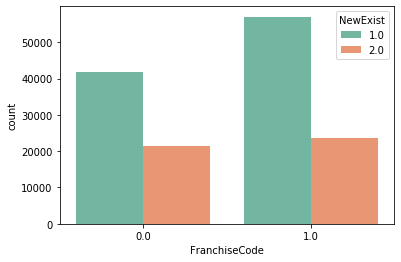

In [79]:
# FranchiseCode countplot
sns.countplot('FranchiseCode', hue='NewExist',data = bank, palette= 'Set2')

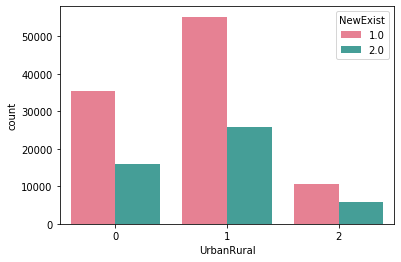

In [80]:
# UrbanRural countplot
sns.countplot('UrbanRural', hue='NewExist',data = bank, palette= 'husl')

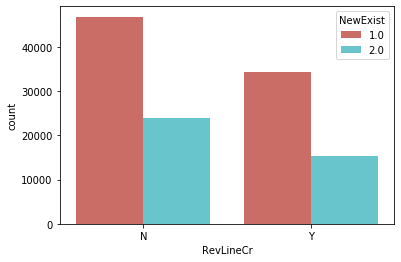

In [81]:
# RevLineCr countplot
sns.countplot('RevLineCr', hue='NewExist',data = bank, palette= 'hls')

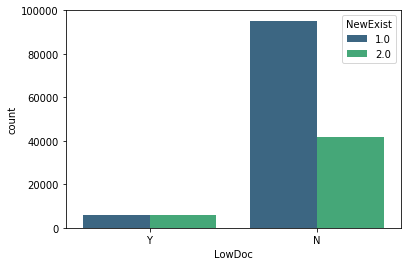

In [82]:
# LowDoc countplot
sns.countplot('LowDoc', hue='NewExist',data = bank, palette= 'viridis')

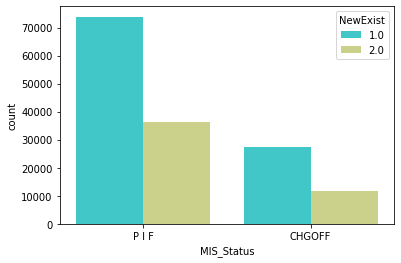

In [83]:
# MIS_Status countplot
sns.countplot('MIS_Status', hue='NewExist',data = bank, palette= 'rainbow')

Based on the Given countplots, considering LowDoc countplot for Imputation purose. Becouse, in this plot, there have more chance to get "2" in NewDoc variable value when LowDoc is "Y". So, imputing the nan values in the NewExist variable with '2' when LowDoc is "Y. And other NaN are considering as '1'.

###### Imputation on NewExist Variable:

In [84]:
# Definition for filling NaN on NewExist variable with '2' when LowDoc is "Y. And other NaN are considering as '1'.
def impute_NewExist(cols):
    NewExist = cols[0]
    LowDoc = cols[1]
    
    if pd.isnull(NewExist):
        if LowDoc == 'Y':
            return 2
        else:
            return 1
    else:
        return NewExist
    
#applying def
bank['NewExist'] = bank[['NewExist','LowDoc']].apply(impute_NewExist, axis = 1)

In [85]:
print ('Total Null values :')
bank.isnull().sum()

Total Null values :


Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
FranchiseCode         5254
UrbanRural               0
RevLineCr            28493
LowDoc                   0
DisbursementGross        0
MIS_Status               0
GrAppv                   0
SBA_Appv                 0
dtype: int64

### Treating NaN value in FranchiseCode Variable

In [86]:
# Checking the variable balanced or not
bank['FranchiseCode'].value_counts(dropna = False)

1.0    80759
0.0    63105
NaN     5254
Name: FranchiseCode, dtype: int64

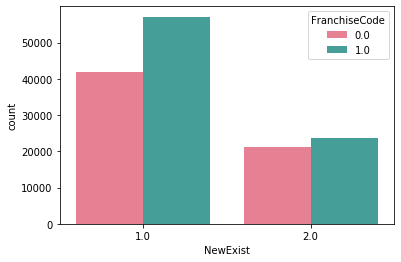

In [87]:
# MIS_Status countplot
sns.countplot('NewExist', hue='FranchiseCode',data = bank, palette= 'husl')

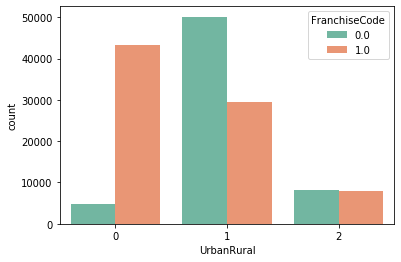

In [88]:
# UrbanRural countplot
sns.countplot('UrbanRural', hue='FranchiseCode',data = bank, palette= 'Set2')

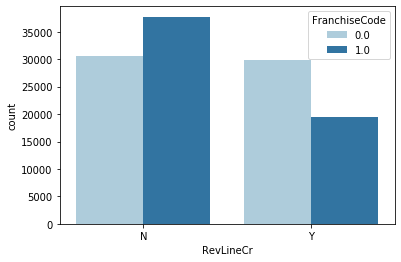

In [89]:
# RevLineCr countplot
sns.countplot('RevLineCr', hue='FranchiseCode',data = bank, palette= 'Paired')

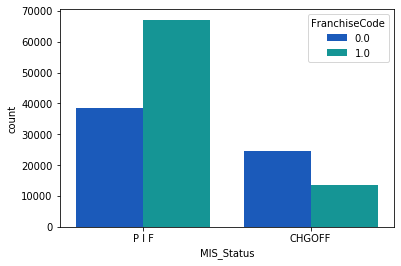

In [90]:
# MIS_Status countplot
sns.countplot('MIS_Status', hue='FranchiseCode',data = bank, palette= 'winter')

Considering UrbannRural Countplot from the following countplots for imputation procedure on FranchiseCode variable. Because there have higher chance of occuring  FranchiseCode as '1' when UrbanRural category as '0'.When  UrbanRural category as '1', the  high chance of getting FranchiseCode as '0' and UrbanRural category as '2',the most occuring FranchiseCode  is '0'. Then Imputing the NaN in FranchiseCode with '1' when UrbanRural category as '0' and imputing FranchiseCode with '0' when UrbanRural category as '1' and '2'.

###### Imputation on FranchiseCode Variable :

In [91]:
# Definition for Imputing the NaN in FranchiseCode with '1' when UrbanRural category as '0' and imputing FranchiseCode 
#        with '0' when UrbanRural category as '1' and '2'.
def impute_Franch(cols):
    FranchiseCode = cols[0]
    UrbanRural = cols[1]
    
    if pd.isnull(FranchiseCode):
        if UrbanRural == 0:
            return 1
        else:
            return 0
    else:
        return FranchiseCode
    
#applying def
bank['FranchiseCode'] = bank[['FranchiseCode','UrbanRural']].apply(impute_Franch, axis = 1)

In [92]:
print ('Total Null values :')
bank.isnull().sum()

Total Null values :


Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
FranchiseCode            0
UrbanRural               0
RevLineCr            28493
LowDoc                   0
DisbursementGross        0
MIS_Status               0
GrAppv                   0
SBA_Appv                 0
dtype: int64

RevLineCr have large number of missing values. Therefore the mode imputation is not agood method for treating null values. So, here considering KNN imputation method for imputation.

### Data Formatting Before KNN Imputation on RevLineCr 

Before performing classification imputation procedure on RevLineCr variable, There have some procedure to do in bank dataset. They are follows;
1. Checking the Correlation between variables and checking of presence of duplicate values in different variables.
2. Collinearity problem solving 
3. Giving Binary value for categorical features.

##### 1. Checking the duplication of values in different variables

Its a banking related business problem, So here have a chance to get duplication of values in some variables. These duplicate values leads to creating multicollinearity problem and it will negatively affects the classification model. So checking the correlation between variables;

###### > Correlation Matrix Heatmap

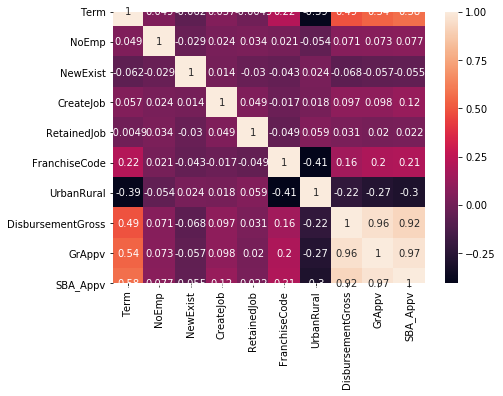

In [140]:
# Heatmap of Correlation Matrix
import matplotlib.pylab as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(bank.corr(), annot= True)

Based on correlation matrix heatmap, the correlation between DisbursementGross, GrAppv  and SBA_Appv are greater than 0.9. Therefore multicollinearity problem is visible here. Then have to solve it through droping of less informative variables. Then checking the importance of these variables and dropping two variable from these three variables are essential for further move.

##### 2. Collinearity problem Solving
###### > Comparison between these three varibles for droping of  two less informative variable;
1. DisbursementGross
2. GrAppv
3. SBA_Appv

In [152]:
print ('Comparison between these three varibles for droping of two less informative variable;')
print('          1.DisbursementGross')
print('          2.GrAppv')
print('          3.SBA_Appv')
print ("***********************************************************************************")
print( 'Comparing the two varibles DisbursementGross and GrAppv  : ')
print('')
print('Total number of data when DisbursementGross and GrAppv are equal     : ',
      bank[bank['DisbursementGross'] == bank['GrAppv']].shape[0])
print('Total number of data when DisbursementGross and GrAppv are different : ',
      bank[bank['DisbursementGross']!= bank['GrAppv']].shape[0])
print(' ')
print('Total number of data when DisbursementGross less than GrAppv         : ',
      bank[bank['DisbursementGross'] < bank['GrAppv']].shape[0])
print('Total number of data when DisbursementGross greater than GrAppv      : ',
      bank[bank['DisbursementGross'] > bank['GrAppv']].shape[0])
print ("***********************************************************************************")
print( 'Comparing the two varibles DisbursementGross and SBA_Appv  : ')
print('')
print('Total number of data when DisbursementGross and SBA_Appv are equal     : ',
      bank[bank['DisbursementGross'] == bank['SBA_Appv']].shape[0])
print('Total number of data when DisbursementGross and SBA_Appv are different : ',
      bank[bank['DisbursementGross']!= bank['SBA_Appv']].shape[0])
print(' ')
print('Total number of data when DisbursementGross less than SBA_Appv         : ',
      bank[bank['DisbursementGross'] < bank['SBA_Appv']].shape[0])
print('Total number of data when DisbursementGross greater than SBA_Appv      : ',
      bank[bank['DisbursementGross'] > bank['SBA_Appv']].shape[0])
print ("************************************************************************************")
print( '# Comparing the two varibles GrAppv and SBA_Appv  : ')
print('')
print('Total number of data when GrAppv and SBA_Appv are equal     : ',
      bank[bank['GrAppv'] == bank['SBA_Appv']].shape[0])
print('Total number of data when GrAppv and SBA_Appv are different : ',
      bank[bank['GrAppv']!= bank['SBA_Appv']].shape[0])
print(' ')
print('Total number of data when GrAppv less than SBA_Appv         : ',
      bank[bank['GrAppv'] < bank['SBA_Appv']].shape[0])
print('Total number of data when GrAppv greater than SBA_Appv      : ',
      bank[bank['GrAppv'] > bank['SBA_Appv']].shape[0])
print ("************************************************************************************")

Comparison between these three varibles for droping of two less informative variable;
          1.DisbursementGross
          2.GrAppv
          3.SBA_Appv
***********************************************************************************
Comparing the two varibles DisbursementGross and GrAppv  : 

Total number of data when DisbursementGross and GrAppv are equal     :  99244
Total number of data when DisbursementGross and GrAppv are different :  49874
 
Total number of data when DisbursementGross less than GrAppv         :  7728
Total number of data when DisbursementGross greater than GrAppv      :  42146
***********************************************************************************
Comparing the two varibles DisbursementGross and SBA_Appv  : 

Total number of data when DisbursementGross and SBA_Appv are equal     :  7342
Total number of data when DisbursementGross and SBA_Appv are different :  141776
 
Total number of data when DisbursementGross less than SBA_Appv         :  210

Based on the following classification , when comparing with other variables, Disbursement gross variable is more informative. Why because, DisbursementGross includes less than and greater than GrAppv and SBA_Appv values. So dropping GrAppv and SBA_Appv from the bank data for solving multicollinearity problem and it also fixed the duplication problem.

In [ ]:
# Droping GrAppv and SBA_Appv from bank data
bank.drop(['GrAppv','SBA_Appv'],axis=1,,inplace=True)

###### > Checking of collinearity after droping GrAppv and SBA_Appv

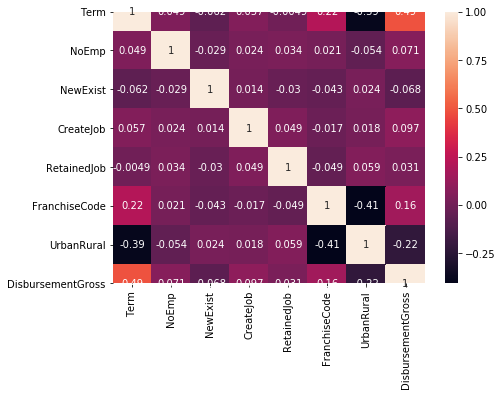

In [159]:
# Heatmap of Correlation Matrix
import matplotlib.pylab as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(bank.corr(), annot= True)

##### 3. Giving Binary value for categorical features.
###### > Binary values  for Categorical variable ;
1. NewExist--> New_Business = 1, Existing_Business = 0
2. FranchiseCode --> Franchise_Yes = 1, Franchise_No = 0
3. UrbanRural --> Rural = 0, Urban = 1, Undefined =2
4. RevLineCr --> Yes = 1, No = 0
5. LowDoc -->  Yes = 1, No = 0
6. MIS_Status --> CHGOFF(high_risk) = 1, PIF(low_risk) = 0

In [190]:
# Replacing Strings with corrresponding binary values
bank['NewExist'] = bank['NewExist'].map({1:0,2:1})
bank['FranchiseCode'] = bank['FranchiseCode'].map({1:0,0:1})
bank['UrbanRural'] = bank['UrbanRural'].map({0:2,1:1,2:0})
bank['RevLineCr'] = bank['RevLineCr'].map({'Y':1,'N':0})
bank['LowDoc'] = bank['LowDoc'].map({'Y':1,'N':0})
bank['MIS_Status'] = bank['MIS_Status'].map({'P I F':0,'CHGOFF':1})

In [192]:
# Save the data
bank.to_csv('bank_binary.csv',encoding='utf-8')

In [209]:
bank.head(4)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status
0,84.0,4,1,0,0,0,2,0.0,1,60000.0,0
1,60.0,2,1,0,0,0,2,0.0,1,40000.0,0
2,180.0,7,0,0,0,0,2,0.0,0,287000.0,0
3,60.0,2,0,0,0,0,2,0.0,1,35000.0,0


### Treating NaN value in RevLineCr

In [193]:
print ('Value Counts in RevLineCr')
bank['RevLineCr'].value_counts(dropna=False)

Value Counts in RevLineCr


0.0    70938
1.0    49687
NaN    28493
Name: RevLineCr, dtype: int64

RevLineCr have 28493  missing values. Therefore the mode imputation is not a good method for treating null values. So, here considering KNN  imputation method for imputation .

#### Different Countplots for understanding of data with hue = RevLineCr

Countplot of NewExist 


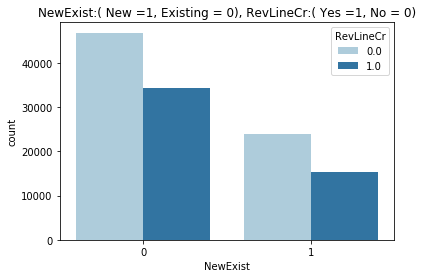

In [215]:
# NewExist countplot
import matplotlib.pylab as plt
import seaborn as sns
print ('Countplot of NewExist ')
plt.title('NewExist:( New =1, Existing = 0), RevLineCr:( Yes =1, No = 0)')
sns.countplot('NewExist', hue='RevLineCr',data = bank, palette= 'Paired')

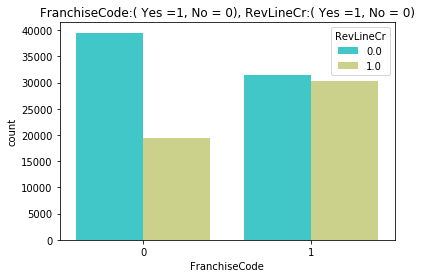

In [216]:
# FranchiseCode countplot
plt.title('FranchiseCode:( Yes =1, No = 0), RevLineCr:( Yes =1, No = 0)')
sns.countplot('FranchiseCode', hue='RevLineCr',data = bank, palette= 'rainbow')

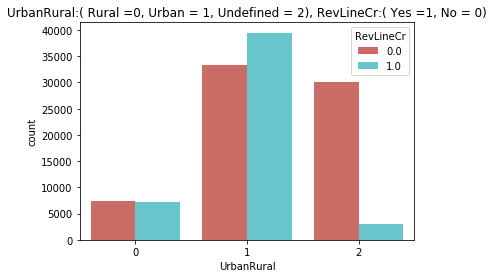

In [217]:
# UrbanRural countplot
plt.title('UrbanRural:( Rural =0, Urban = 1, Undefined = 2), RevLineCr:( Yes =1, No = 0)')
sns.countplot('UrbanRural', hue='RevLineCr',data = bank, palette= 'hls')

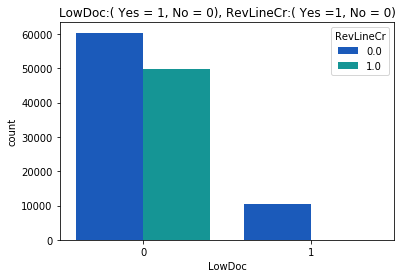

In [218]:
# LowDoc countplot
plt.title('LowDoc:( Yes = 1, No = 0), RevLineCr:( Yes =1, No = 0)')
sns.countplot('LowDoc', hue='RevLineCr',data = bank, palette= 'winter')

considering with LowDoc countplot, when LowDoc is Yes, RevLineCr is classified as No. So imputing the Nan with '0'in RevLineCr when the LowDoc is '1'.

In [335]:
# Definition for filling the Nan with '0'in RevLineCr when the LowDoc is '1'.
def impute_RevLineCr(cols):
    RevLineCr = cols[0]
    LowDoc = cols[1]
    
    if pd.isnull(RevLineCr):
        if LowDoc == 1:
            return 0
    else:
        return RevLineCr
    
#applying def
bank['RevLineCr'] = bank[['RevLineCr','RevLineCr']].apply(impute_RevLineCr, axis = 1)

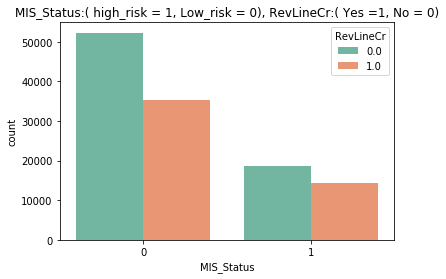

In [220]:
# MIS_Status countplot
plt.title('MIS_Status:( high_risk = 1, Low_risk = 0), RevLineCr:( Yes =1, No = 0)')
sns.countplot('MIS_Status', hue='RevLineCr',data = bank, palette= 'Set2')

### KNN Imputation Method applying on RevLineCr Variable
KNN Imputation used here for imputation purpose. 
Here considering RevLineCr as dependent variable. All missing values in RevLineCR included raws in bank data Considering to Test dataset and the other raws are considering to Train dataset.
Here bulding a classification model with output variable RevLinecr. After building the model in train dataset with high accuracy, then it used for predicting the test. Atlast, the predicted test data will joning with train dataset.

In [236]:
# Reindexing of bank data for KNN Imputation
bank = bank.reindex(['Term','DisbursementGross', 'NoEmp', 'NewExist','CreateJob',
                     'RetainedJob','FranchiseCode', 'UrbanRural',  'LowDoc','MIS_Status','RevLineCr'],axis=1)
bank.to_csv('bank_data_2.csv',encoding ='utf-8')

###### Considering all missing values included raws as Test data and the other raws are considering as Train data.

In [8]:
# train dataset
train = bank.dropna(axis = 0)
train.reset_index(inplace=True)
del train['index']

In [9]:
# test dataset
test = bank[bank['RevLineCr'].isnull()== True]
test.reset_index(inplace=True)
del test['index']

###### > model K=2

In [14]:
# KNN usin Sklearn with considering 2 nearest neighbours
from sklearn.neighbors import KNeighborsClassifier as KNC
neig = KNC(n_neighbors=2)
# Fitting with training data 
neig.fit(train.iloc[:,0:10],train.iloc[:,10])

KNeighborsClassifier(n_neighbors=2)

In [15]:
# Predicting train data
pred_train = neig.predict(train.iloc[:,0:10])

In [16]:
# train accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Metrics:')
print(' ', confusion_matrix(train.iloc[:,10],pred_train))
Con = confusion_matrix(train.iloc[:,10],pred_train)
print('train accuracy is :',Con.diagonal().sum()/Con.sum()*100,'%')

Confusion Metrics:
  [[70085   853]
 [16190 33497]]
train accuracy is : 85.87108808290157 %


###### Running KNN algorithm for 3 to 20 nearest neighbours(odd numbers) and polt the accuracy values  when K increases;

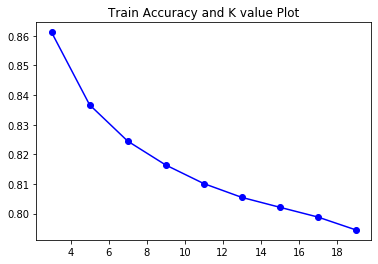

In [305]:
acc = []
for i in range(3,20,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:10],train.iloc[:,10])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:10])==train.iloc[:,10])
    acc.append([train_acc])
# train accuracy plots 
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,4))
plt.title('Train Accuracy and K value Plot')
plt.plot(np.arange(3,20,2),[i[0] for i in acc],"bo-")

###### > model K=1

In [17]:
# KNN usin Sklearn with considering 1 nearest neighbours
from sklearn.neighbors import KNeighborsClassifier as KNC
neig = KNC(n_neighbors=1,weights='uniform')
# Fitting with training data 
neig.fit(train.iloc[:,0:10],train.iloc[:,10])

KNeighborsClassifier(n_neighbors=1)

In [18]:
# Predicting train data
pred_train = neig.predict(train.iloc[:,0:10])

In [19]:
# train accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Metrics:')
print(' ', confusion_matrix(train.iloc[:,10],pred_train))
Con = confusion_matrix(train.iloc[:,10],pred_train)
print('train accuracy is :',Con.diagonal().sum()/Con.sum()*100,'%')

Confusion Metrics:
  [[68227  2711]
 [ 3220 46467]]
train accuracy is : 95.08310880829015 %


Selecting model K=1 , for predict test data. Because of model K= 1 has highest train accuracy.

###### > Predicting test data with using model K=1


In [20]:
pred_test = pd.DataFrame(neig.predict(test.iloc[:,0:10]))
pred_test.columns = ['RevLineCr']

pred_test dataframe is joining with test data;

In [21]:
# pred_test dataframe is joining with test data;
del test['RevLineCr']
test=test.join(pred_test['RevLineCr'])
test['RevLineCr']= test['RevLineCr'].astype(int)

###### > Concat train dataset and test dataset

In [53]:
import pandas as pd
bank = pd.concat([test,train],axis=0,ignore_index=True)

In [54]:
bank.shape

(149118, 11)

In [59]:
print('Final bank data, after data cleaning and imputation procedure')
bank.head(5)

Final bank data, after data cleaning and imputation procedure


,Term,DisbursementGross,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,RevLineCr
0,60.0,50000.0,2,1,0,0,0,2,0,0,0.0
1,84.0,20000.0,4,0,1,4,0,1,0,0,1.0
2,180.0,245000.0,7,0,0,0,0,2,0,0,0.0
3,84.0,225000.0,3,0,0,0,0,2,0,0,0.0
4,126.0,40000.0,5,0,0,0,0,2,0,0,0.0


## 1.3 Analysis of Relationship Between Variables

### Data:

In [32]:
bank.head(4)

,Term,DisbursementGross,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,RevLineCr
0,60.0,50000.0,2,1,0,0,0,2,0,0,0.0
1,84.0,20000.0,4,0,1,4,0,1,0,0,1.0
2,180.0,245000.0,7,0,0,0,0,2,0,0,0.0
3,84.0,225000.0,3,0,0,0,0,2,0,0,0.0


### Summary

In [7]:
print( ' Summary Statistics of numerical variables :')
col = ['Term','DisbursementGross','NoEmp','CreateJob','RetainedJob']
bank[col].describe().T

 Summary Statistics of numerical variables :


,count,mean,std,min,25%,50%,75%,max
Term,149118.0,93.202772,69.375185,1.0,58.0,84.0,84.0,480.0
DisbursementGross,149118.0,142115.994414,218960.686316,4000.0,30000.0,66600.0,150000.0,4029520.0
NoEmp,149118.0,9.292285,76.956490,0.0,2.0,4.0,8.0,9999.0
CreateJob,149118.0,1.281006,10.980435,0.0,0.0,0.0,0.0,3000.0
RetainedJob,149118.0,3.686892,27.756936,0.0,0.0,1.0,4.0,9500.0


Based on summary statistics, there have outliers problem on the numeric variables and also having scaling issue.

In [ ]:
bank = bank.reindex(['DisbursementGross','Term', 'CreateJob','RetainedJob','NoEmp',
              'NewExist', 'FranchiseCode', 'UrbanRural', 'LowDoc', 'RevLineCr','MIS_Status'],axis=1)
bank['RevLineCr'] = bank['RevLineCr'].astype(int)

### Correlation Matrix

In [14]:
print (' Correlation Matrix of numerical variables:')
corr = bank.corr()
corr

 Correlation Matrix of numerical variables:


,DisbursementGross,Term,CreateJob,RetainedJob,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,RevLineCr,MIS_Status
DisbursementGross,1.000000,0.493264,0.096812,0.030635,0.070981,-0.067816,-0.158636,0.219927,-0.113572,-0.175409,-0.103992
Term,0.493264,1.000000,0.056955,-0.004893,0.048926,-0.061987,-0.216611,0.386304,-0.030991,-0.313828,-0.379819
CreateJob,0.096812,0.056955,1.000000,0.048593,0.023759,0.013548,0.017481,-0.018354,-0.033569,-0.026557,-0.001789
RetainedJob,0.030635,-0.004893,0.048593,1.000000,0.034354,-0.029910,0.048900,-0.058516,-0.038663,0.024198,0.008478
NoEmp,0.070981,0.048926,0.023759,0.034354,1.000000,-0.028988,-0.021086,0.054328,-0.007837,-0.028897,-0.020208
NewExist,-0.067816,-0.061987,0.013548,-0.029910,-0.028988,1.000000,0.042811,-0.023794,0.118910,-0.017801,-0.030256
FranchiseCode,-0.158636,-0.216611,0.017481,0.048900,-0.021086,0.042811,1.000000,-0.406717,-0.260677,0.207373,0.244141
UrbanRural,0.219927,0.386304,-0.018354,-0.058516,0.054328,-0.023794,-0.406717,1.000000,0.351518,-0.333317,-0.195425
LowDoc,-0.113572,-0.030991,-0.033569,-0.038663,-0.007837,0.118910,-0.260677,0.351518,1.000000,-0.223738,-0.124552
RevLineCr,-0.175409,-0.313828,-0.026557,0.024198,-0.028897,-0.017801,0.207373,-0.333317,-0.223738,1.000000,0.063602


### Heatmap Visuslisation of Correlation

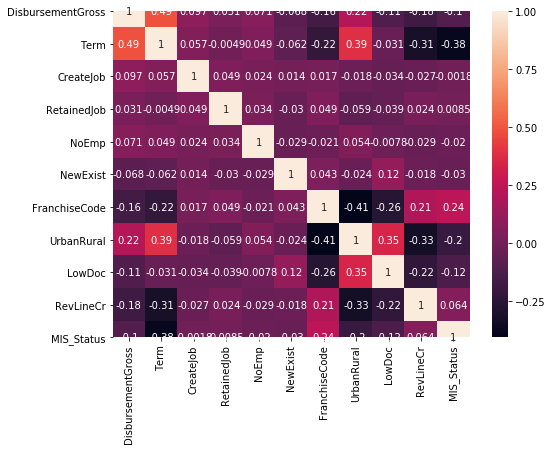

In [15]:
# heatmap
import matplotlib.pylab as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot= True)

 > No collinearity between Variables.

### Pair Plot
Graphical representation for identifying Correlation between variables, Distribution of the variables and Overlapping.

#### > Pairplot for numerical variables, hue = MIS_Status

In [143]:
# replacing 0 and 1 with 'HighRisk' and 'LowRisk' resoectively for better understanding in pairplot
bank['MIS_Status'] = bank['MIS_Status'].map({1:'HighRisk',0:'LowRisk'})

In [144]:
col_num = ['Term','DisbursementGross','NoEmp','CreateJob','RetainedJob','MIS_Status']

<Figure size 1152x1008 with 0 Axes>

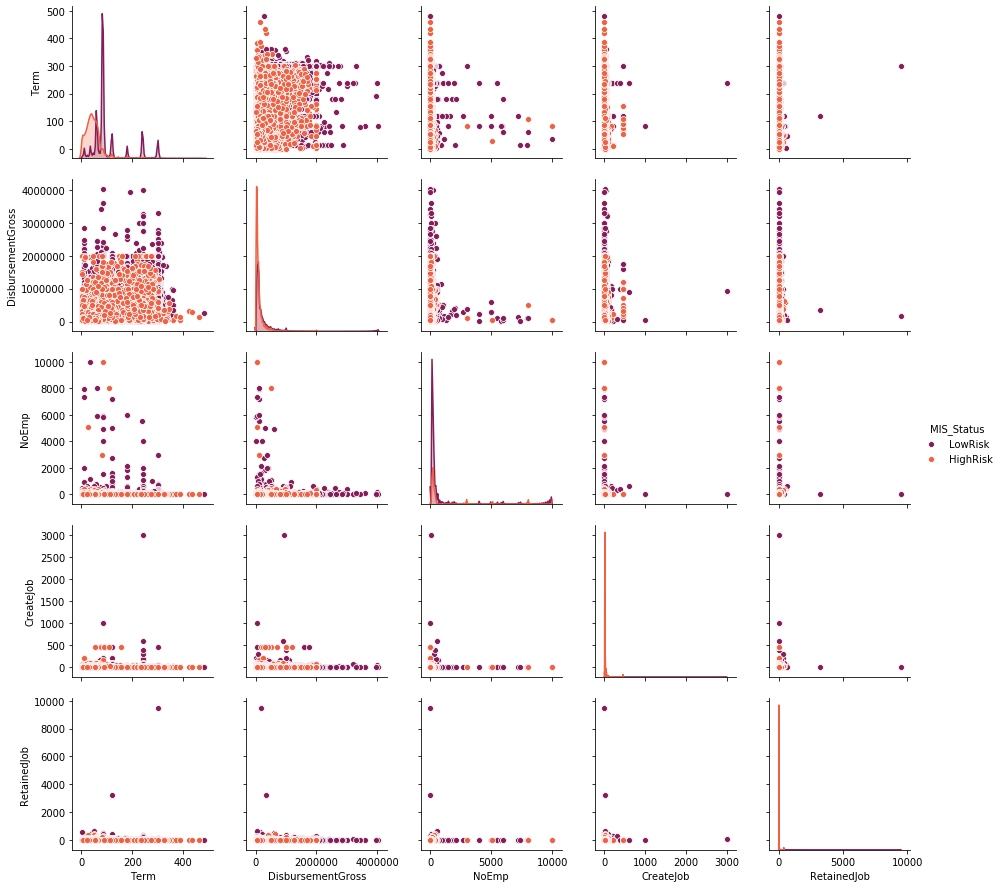

In [145]:
# pairplot for numerical variables, hue = MIS_Status
import matplotlib.pylab as plt
import seaborn as sns
plt.figure(figsize=(16,14))
sns.pairplot(bank[col_num], hue= 'MIS_Status',palette='rocket')

 Based on pairplot, the overlaping is low. So, assumes that there is a chance for getting good result in Logistic Regression.
 And the presence of outliers are visible in this plot.

In [148]:
bank['MIS_Status'] = bank['MIS_Status'].map({'HighRisk':1,'LowRisk':0})

#### > Pairplot for numerical variables, hue = NewExist

In [57]:
col = ['Term','DisbursementGross','NoEmp','CreateJob','RetainedJob','NewExist']

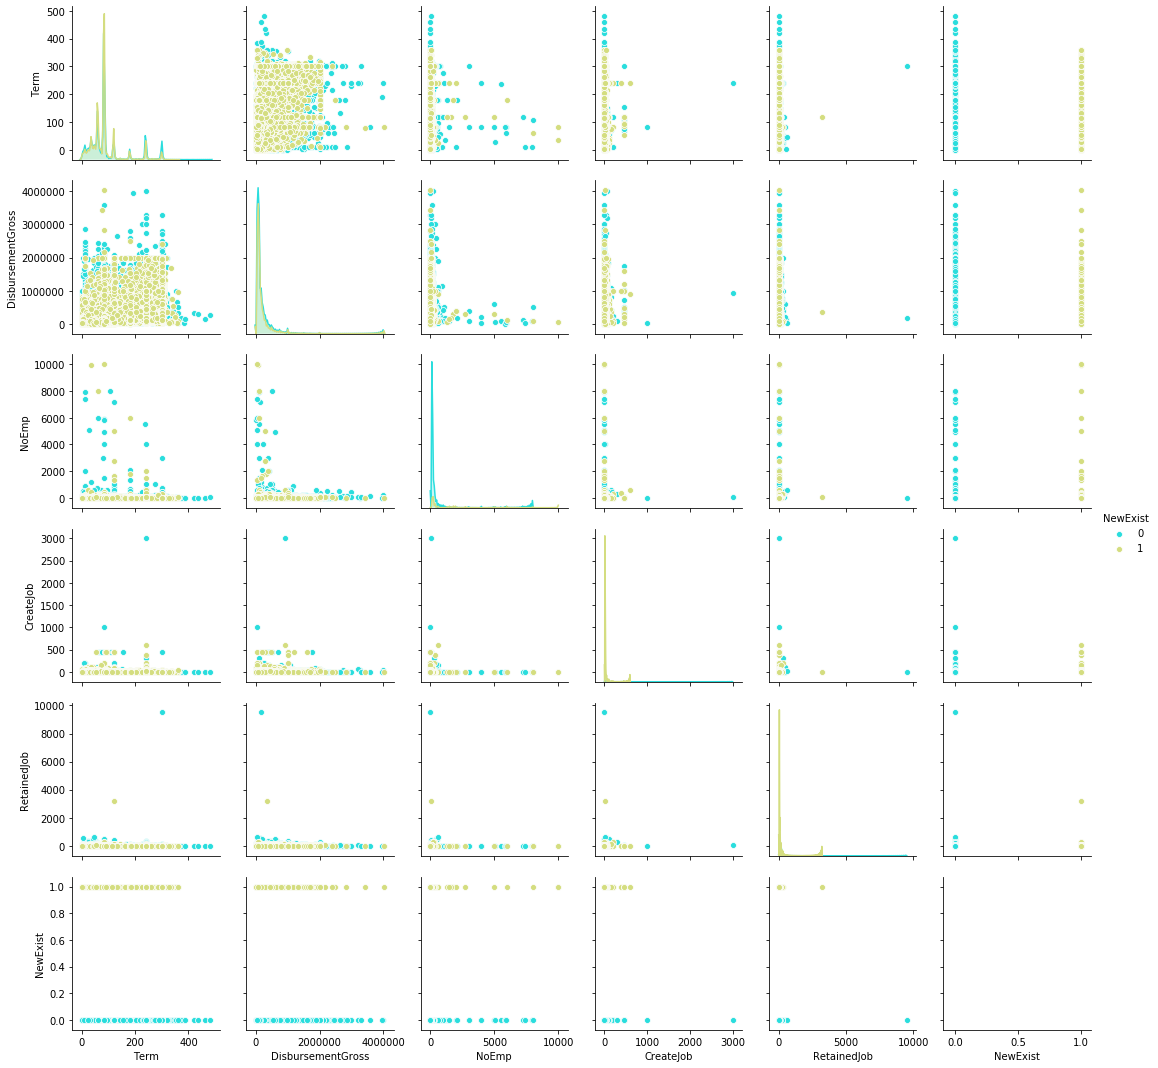

In [62]:
# pairplot for categorical variables
sns.pairplot(bank[col], hue= 'NewExist',palette='Paired')

##### > Pairplot for numerical variables, hue = FranchiseCode

In [65]:
col = ['Term','DisbursementGross','NoEmp','CreateJob','RetainedJob','FranchiseCode']

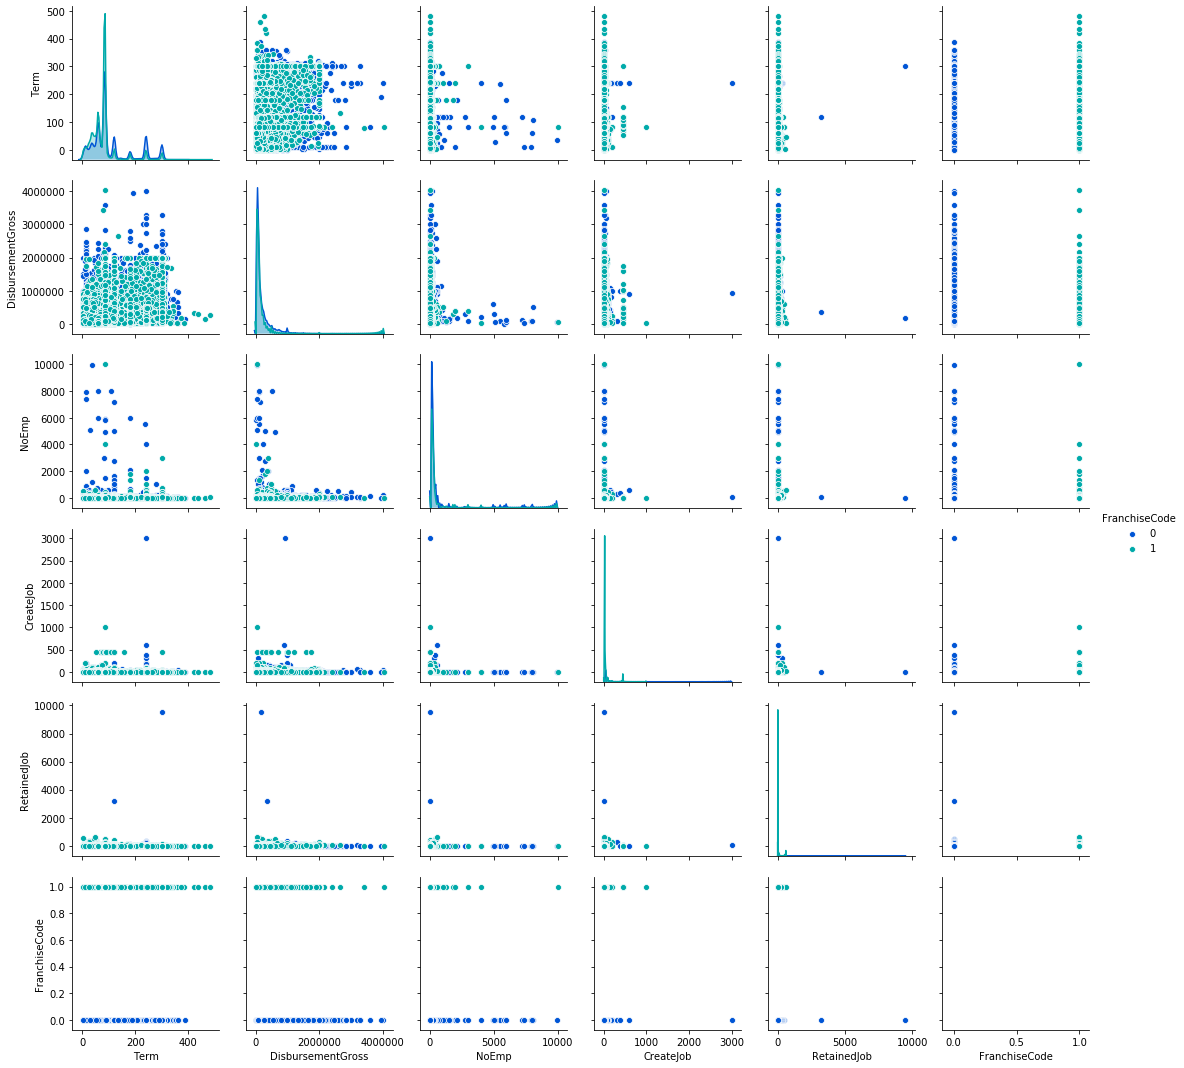

In [68]:
# pairplot for categorical variables, hue = FranchiseCode
sns.pairplot(bank[col], hue= 'FranchiseCode',palette='winter')

##### > Pairplot for numerical variables, hue = UrbanRural

In [11]:
col = ['Term','DisbursementGross','NoEmp','CreateJob','RetainedJob','UrbanRural']

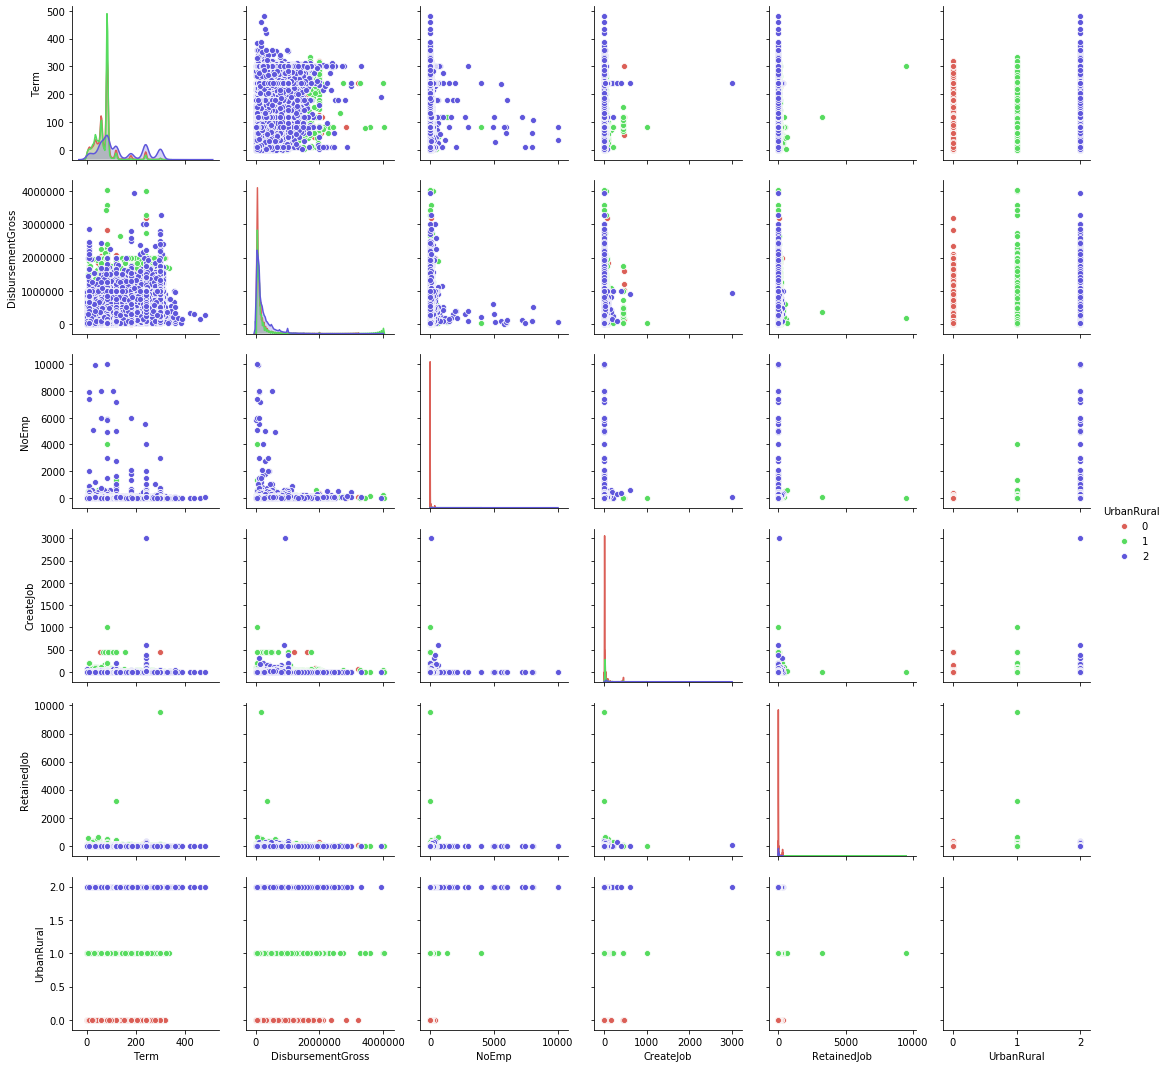

In [13]:
# pairplot for categorical variables, hue = UrbanRural
sns.pairplot(bank[col], hue= 'UrbanRural',palette='hls')

##### > Pairplot for numerical variables, hue = LowDoc

In [15]:
col = ['Term','DisbursementGross','NoEmp','CreateJob','RetainedJob','LowDoc']

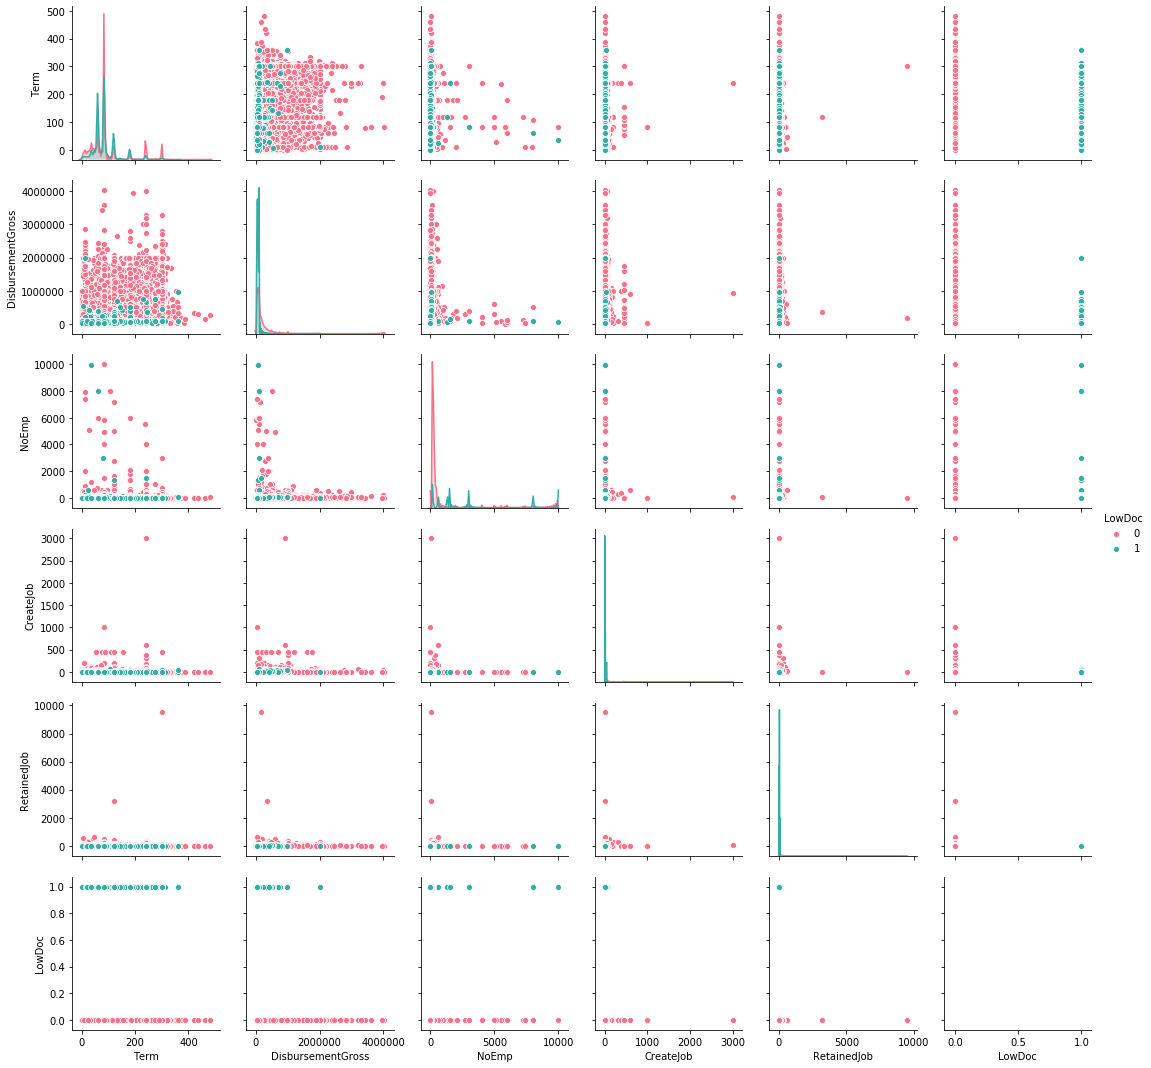

In [16]:
# pairplot for categorical variables, hue = LowDoc
sns.pairplot(bank[col], hue= 'LowDoc',palette='husl')

##### > Pairplot for numerical variables, hue = RevLineCr

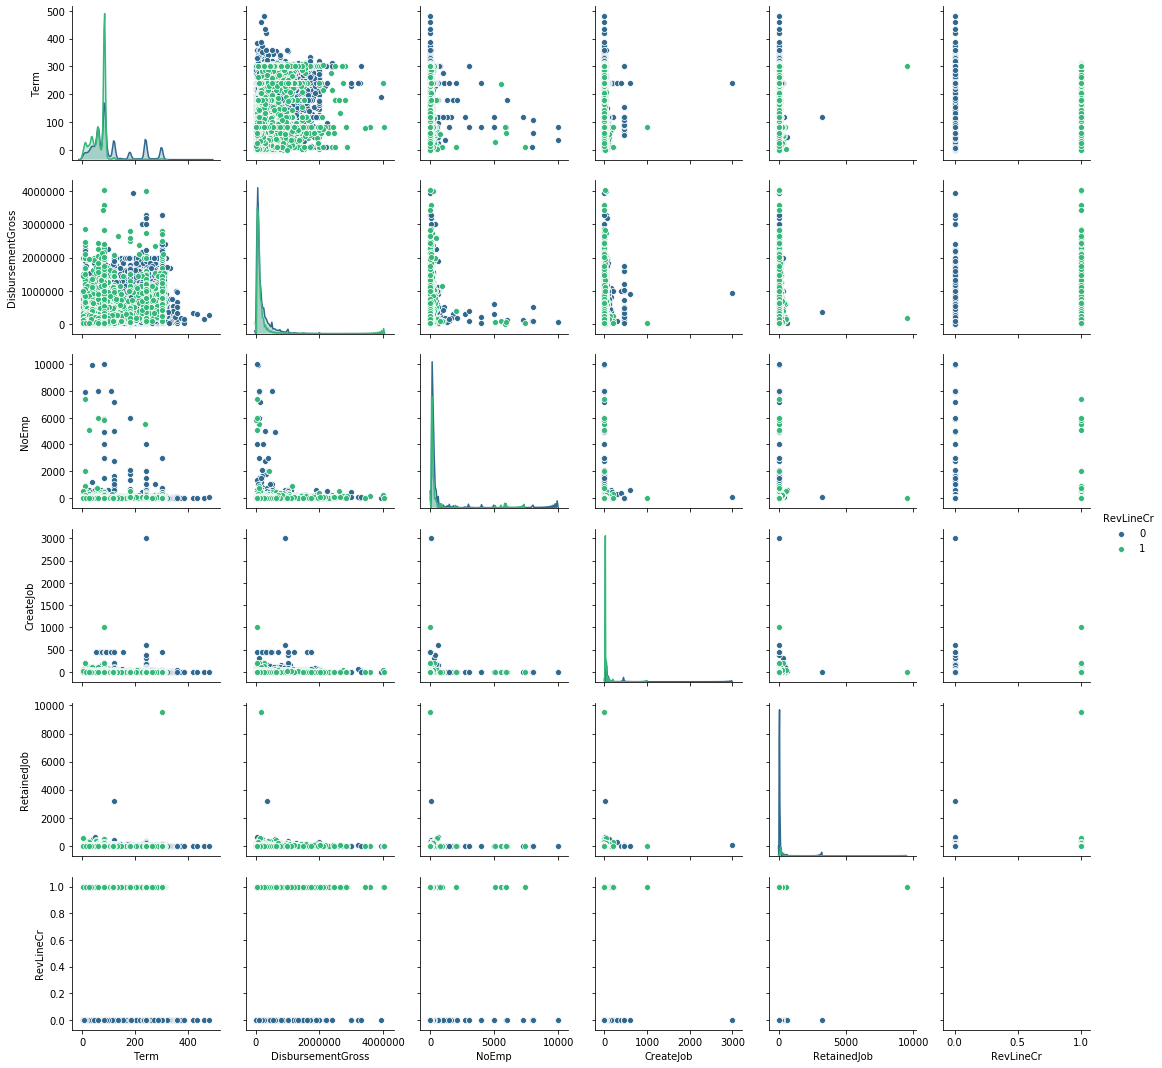

In [20]:
bank['RevLineCr'] = bank['RevLineCr'].astype(int)
col = ['Term','DisbursementGross','NoEmp','CreateJob','RetainedJob','RevLineCr']
# pairplot for categorical variables, hue = RevLineCr
sns.pairplot(bank[col], hue= 'RevLineCr',palette='viridis')

### Distribution Plots
Checking the variables are normal or not. And understanding of outliers in the variables. 

In [21]:
print( ' Summary Statistics of numerical variables :')
col = ['Term','DisbursementGross','NoEmp','CreateJob','RetainedJob']
bank[col].describe().T

 Summary Statistics of numerical variables :


,count,mean,std,min,25%,50%,75%,max
Term,149118.0,93.202772,69.375185,1.0,58.0,84.0,84.0,480.0
DisbursementGross,149118.0,142115.994414,218960.686316,4000.0,30000.0,66600.0,150000.0,4029520.0
NoEmp,149118.0,9.292285,76.956490,0.0,2.0,4.0,8.0,9999.0
CreateJob,149118.0,1.281006,10.980435,0.0,0.0,0.0,0.0,3000.0
RetainedJob,149118.0,3.686892,27.756936,0.0,0.0,1.0,4.0,9500.0


##### > Distribution of Term variable

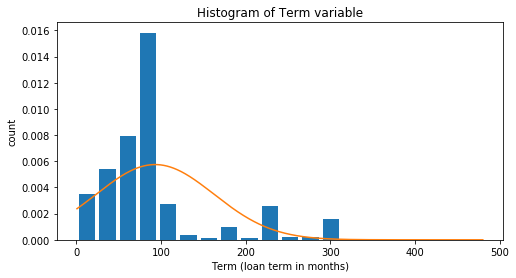

In [34]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(8,4))
plt.title('Histogram of Term variable')
plt.hist(bank['Term'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Term (loan term in months)')
plt.ylabel('count')
# Normal distribution line
rng = np.arange(bank['Term'].min(),bank['Term'].max(), 0.1)
plt.plot(rng,norm.pdf(rng, bank['Term'].mean(),bank['Term'].std()))

##### > Distribution of DisbursementGross variable

Text(0, 0.5, 'count')

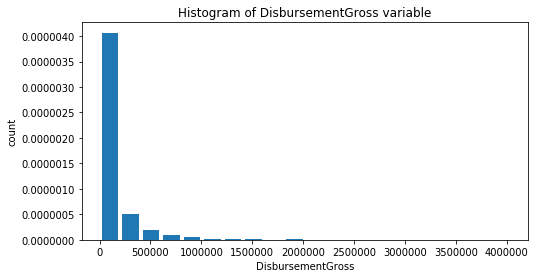

In [43]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(8,4))
plt.title('Histogram of DisbursementGross variable')
plt.hist(bank['DisbursementGross'], bins=20, rwidth=0.8, density=True)
plt.xlabel('DisbursementGross')
plt.ylabel('count')

##### > Distribution of NoEmp variable

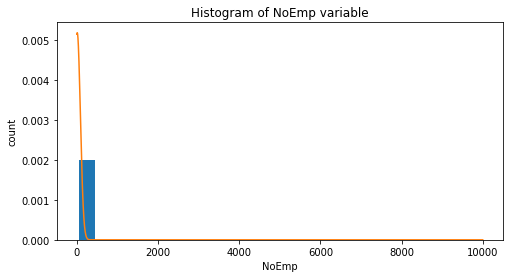

In [44]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(8,4))
plt.title('Histogram of NoEmp variable')
plt.hist(bank['NoEmp'], bins=20, rwidth=0.8, density=True)
plt.xlabel('NoEmp')
plt.ylabel('count')
# Normal distribution line
rng = np.arange(bank['NoEmp'].min(),bank['NoEmp'].max(), 0.1)
plt.plot(rng,norm.pdf(rng, bank['NoEmp'].mean(),bank['NoEmp'].std()))

##### > Distribution of CreateJob variable

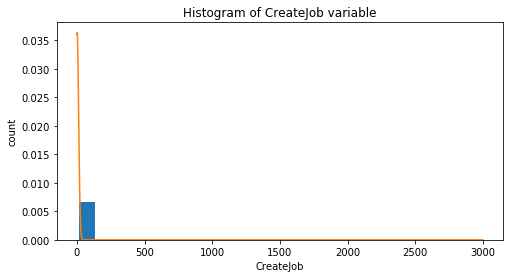

In [45]:
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(8,4))
plt.title('Histogram of CreateJob variable')
plt.hist(bank['CreateJob'], bins=20, rwidth=0.8, density=True)
plt.xlabel('CreateJob')
plt.ylabel('count')
# Normal distribution line
rng = np.arange(bank['CreateJob'].min(),bank['CreateJob'].max(), 0.1)
plt.plot(rng,norm.pdf(rng, bank['CreateJob'].mean(),bank['CreateJob'].std()))

##### > Distribution of RetainedJob variable

Text(0, 0.5, 'count')

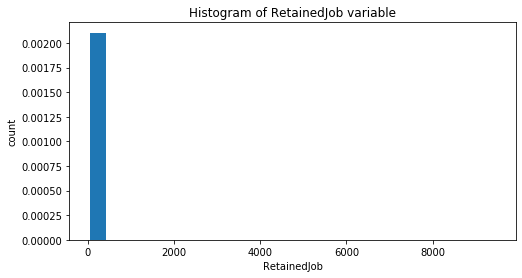

In [13]:
plt.figure(figsize=(8,4))
plt.title('Histogram of RetainedJob variable')
plt.hist(bank['RetainedJob'], bins=20, rwidth=0.8, density=True)
plt.xlabel('RetainedJob')
plt.ylabel('count')

### Boxplot

In [22]:
print( ' Summary Statistics of numerical variables :')
col = ['Term','DisbursementGross','NoEmp','CreateJob','RetainedJob']
bank[col].describe().T

 Summary Statistics of numerical variables :


,count,mean,std,min,25%,50%,75%,max
Term,149118.0,93.202772,69.375185,1.0,58.0,84.0,84.0,480.0
DisbursementGross,149118.0,142115.994414,218960.686316,4000.0,30000.0,66600.0,150000.0,4029520.0
NoEmp,149118.0,9.292285,76.956490,0.0,2.0,4.0,8.0,9999.0
CreateJob,149118.0,1.281006,10.980435,0.0,0.0,0.0,0.0,3000.0
RetainedJob,149118.0,3.686892,27.756936,0.0,0.0,1.0,4.0,9500.0


###### > Boxplot of Term  variable:

Boxplot of Term 


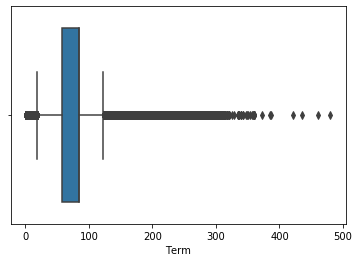

In [16]:
print('Boxplot of Term ')
sns.boxplot(bank.Term)

###### > Boxplot of DisbursementGross:

Boxplot of DisbursementGross 


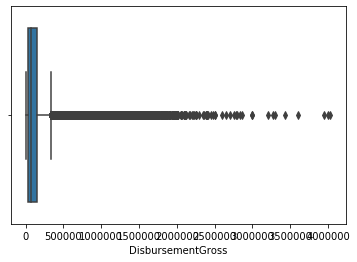

In [17]:
print('Boxplot of DisbursementGross ')
sns.boxplot(bank.DisbursementGross)

###### Boxplot of NoEmp:

Boxplot of NoEmp 


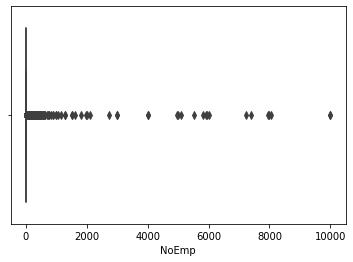

In [18]:
print('Boxplot of NoEmp ')
sns.boxplot(bank.NoEmp)

###### >  Boxplot of  CreateJob:

Boxplot of CreateJob 


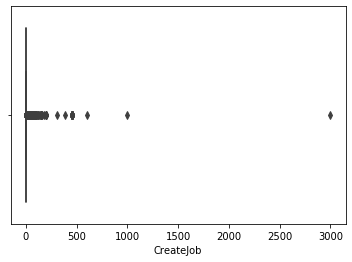

In [19]:
print('Boxplot of CreateJob ')
sns.boxplot(bank.CreateJob)

###### >  Boxplot of RetainedJob:

Boxplot of RetainedJob 


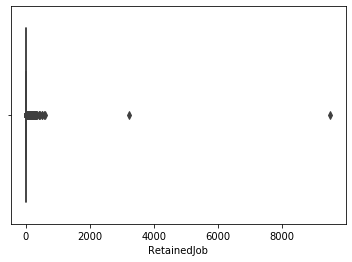

In [20]:
print('Boxplot of RetainedJob ')
sns.boxplot(bank.RetainedJob)

According to the summary ststistics, there have outlier problem in all numerical variables. And the main issue is that, 75% of  the data in CeateJob is 0 and its max value is 3000. So, need to check the relation between following 3 variables;
they are : 1. NoEmp, 2. CreateJob And 3. RetainedJob

###### > Checking the importance of three variables; NoEmp, CreateJob and RetainedJob

In [128]:
col = ['CreateJob','RetainedJob','NoEmp']
bank[col].sample(5)

,CreateJob,RetainedJob,NoEmp
91675,0,1,1
116189,1,1,1
3197,0,0,2
62165,0,42,42
135556,0,1,0


In [123]:
col = ['CreateJob','RetainedJob','NoEmp']
bank[col].describe().T

,count,mean,std,min,25%,50%,75%,max
CreateJob,149118.0,1.281006,10.980435,0.0,0.0,0.0,0.0,3000.0
RetainedJob,149118.0,3.686892,27.756936,0.0,0.0,1.0,4.0,9500.0
NoEmp,149118.0,9.292285,76.956490,0.0,2.0,4.0,8.0,9999.0


In [22]:
print('Total rows in the data is CreateJob+ RetainedJob = NoEmp :',bank[bank['CreateJob']+bank['RetainedJob']==bank['NoEmp']].shape[0]) 

Total rows in the data is CreateJob+ RetainedJob = NoEmp : 53813


In [23]:
print('Total rows in the data is CreateJob+ RetainedJob > NoEmp :',bank[bank['CreateJob']+bank['RetainedJob']>bank['NoEmp']].shape[0]) 

Total rows in the data is CreateJob+ RetainedJob > NoEmp : 32332


In [118]:
print( 'Total number of Zeros in NoEmp is ',bank[bank['NoEmp']==0].shape[0])

Total number of Zeros in NoEmp is  1329


In [132]:
print ('Total rows in the data is CreateJob+ RetainedJob > NoEmp when subtracting 0 values from NoEmp is :',bank[bank['CreateJob']+bank['RetainedJob']>bank['NoEmp']].shape[0]
      -bank[bank['NoEmp']==0].shape[0])

Total rows in the data is CreateJob+ RetainedJob > NoEmp when subtracting 0 values from NoEmp is : 31003


In [24]:
print('Total rows in the data is CreateJob+ RetainedJob < NoEmp :',bank[bank['CreateJob']+bank['RetainedJob']<bank['NoEmp']].shape[0]) 

Total rows in the data is CreateJob+ RetainedJob < NoEmp : 62973


considering that, here have no useful of these three variables, so here total number of Employees is have highy priority for model prediction. So here considering only the NoEmp variales and if there have any zero value, that means no employees in that company. Its will not happen. So, the zero values in the NoEmp will be treated.

###### >>> Treating all zero values in NoEmp to CreateJob+ RetainedJob

In [167]:
# Creating new dataframe of bank that 
new_zero = bank[bank['NoEmp']==0]
new_zero.reset_index(inplace=True)
del new_zero['index']

(535, 11)

In [170]:
# total number of zero values in the following two columns
new_zero[(new_zero['CreateJob']==0) & (new_zero['RetainedJob']==0)].shape

(535, 11)

In [168]:
# Creating New dataframe of bank data that included all rows when NoEmp variable is greater than zero.
new_no_zero = bank[bank['NoEmp']>0]
new_no_zero.reset_index(inplace=True)
del new_no_zero['index']

In [174]:
# checking that the total number of rows are equal with bank data set, whem adding these two dataset
bank.shape[0]==new_zero.shape[0]+new_no_zero.shape[0]

True

In [ ]:
# replaceing all zero in new_zero data with adding CreateJob+ RetainedJob
new_zero['added'] = pd.DataFrame(new_zero['CreateJob']+new_zero['RetainedJob'])
del new_zero['NoEmp']
new_zero = new_zero.reindex(['DisbursementGross', 'Term', 'CreateJob', 'RetainedJob', 'added',
       'NewExist', 'FranchiseCode', 'UrbanRural', 'LowDoc', 'RevLineCr',
       'MIS_Status'],axis=1)
new_zero.columns = ['DisbursementGross', 'Term', 'CreateJob', 'RetainedJob', 'NoEmp',
       'NewExist', 'FranchiseCode', 'UrbanRural', 'LowDoc', 'RevLineCr',
       'MIS_Status']

In [187]:
# Concat with new_no_zero and new_zero; Creating new variable as bank 
bank = pd.concat([new_zero,new_no_zero],axis=0,ignore_index=True)

In [192]:
# deleting two variables, CreateJob and RetainedJob
del bank['CreateJob'],bank['RetainedJob']

In [196]:
# bank data  ; NoEmp variable is Zero
bank[bank["NoEmp"]==0].sample(5)

,DisbursementGross,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,RevLineCr,MIS_Status
1245,17000.0,24.0,0,0,1,0,0,0,0
1279,22060.0,8.0,0,0,1,1,0,1,1
687,10200.0,36.0,0,0,1,1,0,0,0
1202,129777.0,60.0,0,0,1,1,0,1,0
41,125000.0,60.0,0,1,1,1,0,0,0


In [197]:
# final bank data for model building
bank.to_csv('bank_data_for_modelbuilding.csv',encoding='utf-8')
bank.head(5)

,DisbursementGross,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,RevLineCr,MIS_Status
0,40000.0,60.0,5,1,0,0,0,0,0
1,16671.0,17.0,0,1,0,0,0,1,1
2,64202.0,56.0,2,0,0,0,0,0,1
3,20000.0,88.0,4,1,1,1,0,0,0
4,143317.0,120.0,6,1,1,1,0,0,0


# Chapter 2 : Model Building

In [227]:
# Creating dummy variable 
bank = pd.get_dummies(bank,columns=['NewExist', 'FranchiseCode',
       'UrbanRural', 'LowDoc', 'RevLineCr', 'MIS_Status'],drop_first=True)


In [232]:
bank.columns = ['DisbursementGross', 'Term', 'NoEmp', 'NewExist_new', 'FranchiseCode_yes',
       'UrbanRural_urban', 'UrbanRural_undefined', 'LowDoc_yes', 'RevLineCr_yes',
       'MIS_Status_highrisk']

In [235]:
bank.head(4)

,DisbursementGross,Term,NoEmp,NewExist_new,FranchiseCode_yes,UrbanRural_urban,UrbanRural_undefined,LowDoc_yes,RevLineCr_yes,MIS_Status_highrisk
0,40000.0,60.0,5,1,0,0,0,0,0,0
1,16671.0,17.0,0,1,0,0,0,0,1,1
2,64202.0,56.0,2,0,0,0,0,0,0,1
3,20000.0,88.0,4,1,1,1,0,0,0,0


## 2.2: Train_Test Split

In [244]:
X= bank.iloc[:,0:9]
y = bank.iloc[:,9]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [253]:
print('length of X_train is',len(X_train))
print('length of X_test is',len(X_test))

length of X_train is 119294
length of X_test is 29824


In [255]:
# save the data
X_train.to_csv('X_train.csv', encoding='utf-8')
X_test.to_csv('X_test.csv', encoding='utf-8')
y_train.to_csv('y_train.csv', encoding='utf-8')
y_test.to_csv('y_test.csv', encoding='utf-8')

###### >> Countplot of y_train

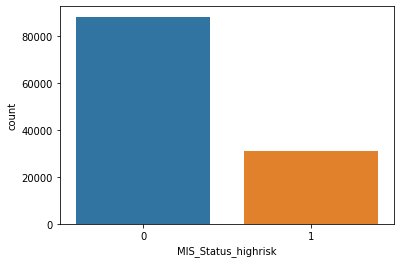

In [81]:
sns.countplot(y_train.MIS_Status_highrisk)

###### >> Countplot of y_test

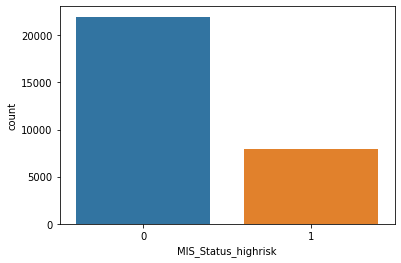

In [82]:
sns.countplot(y_test.MIS_Status_highrisk)

there have a imbalace between the output variable, So we have to more concentrate the error that the total number of 1 is wrongly predicted as 0. we want to decrease the error of 1 is wrongly predicted as 0.

## > Fature Scaling ( Standardization) 
Using Standard scalar

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,0:3]= sc.fit_transform(X_train.iloc[:,0:3])
X_test.iloc[:,0:3] = sc.transform(X_test.iloc[:,0:3])

### Model 1: Logistic Regression

In [32]:
# Fitting logistic model on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [38]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logist = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_logist)
print('Logistic Regression Accuracy in test dataset  is : ',cm_logist.diagonal().sum()/cm_logist.sum()*100,'%')

confusion_matrix is :
[[20335  1605]
 [ 3484  4400]]
Logistic Regression Accuracy of test dataset  is :  82.93656115879828 %


### Model 2: KNN with K = 2

In [41]:
# fitting the model in train
from sklearn.neighbors import KNeighborsClassifier as KNC
classifier = KNC(n_neighbors=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [44]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_KNN = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_KNN)
print('KNN Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[21319   621]
 [ 2591  5293]]
KNN Model Accuracy in test dataset  is :  0.8923015021459227


### Model 2: KNN with K = 2 with hiperparameter tuning

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=2,weights='uniform',algorithm='auto',
    leaf_size=60,p=5,
    metric='minkowski',
    metric_params=None,
    n_jobs=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=60, n_jobs=2, n_neighbors=2, p=5)

In [97]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_KNN = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_KNN)
print('KNN Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[21287   653]
 [ 2546  5338]]
KNN Model Accuracy in test dataset  is :  0.8927373927038627


### Model 3: KNN with K = 3

In [45]:
# fitting the model in train
from sklearn.neighbors import KNeighborsClassifier as KNC
classifier = KNC(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_KNN = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_KNN)
print('KNN Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[20871  1069]
 [ 1561  6323]]
KNN Model Accuracy in test dataset  is :  0.9118159871244635


### Model 4: KNN with K = 4

In [47]:
# fitting the model in train
from sklearn.neighbors import KNeighborsClassifier as KNC
classifier = KNC(n_neighbors=4)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_KNN = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_KNN)
print('KNN Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[21202   738]
 [ 2020  5864]]
KNN Model Accuracy in test dataset  is :  0.9075241416309013


### Model 5: KNN with K = 5

In [49]:
# fitting the model in train
from sklearn.neighbors import KNeighborsClassifier as KNC
classifier = KNC(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_KNN = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_KNN)
print('KNN Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[20944   996]
 [ 1553  6331]]
KNN Model Accuracy in test dataset  is :  0.9145319206008584


### Model 6: KNN with K = 6

In [51]:
# fitting the model in train
from sklearn.neighbors import KNeighborsClassifier as KNC
classifier = KNC(n_neighbors=6)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [52]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_KNN = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_KNN)
print('KNN Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[21131   809]
 [ 1843  6041]]
KNN Model Accuracy in test dataset  is :  0.9110783261802575


### Model 7: KNN with K = 9

In [65]:
# fitting the model in train
from sklearn.neighbors import KNeighborsClassifier as KNC
classifier = KNC(n_neighbors=9)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [66]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_KNN = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_KNN)
print('KNN Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[20944   996]
 [ 1575  6309]]
KNN Model Accuracy in test dataset  is :  0.9137942596566524


#### Test accuracy and K value relation plot; K= 3 - 20 range

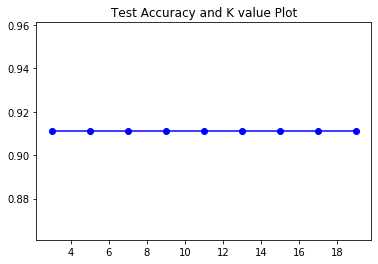

In [60]:
# Test Accuracy PLot;
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import confusion_matrix, accuracy_score
acc = []
for i in range(3,20,2):
    classifier = KNC(n_neighbors=i)
    classifier.fit(X_train,y_train)
    classifier.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    test_acc = cm.diagonal().sum()/cm.sum()
    acc.append([test_acc])
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,4))
plt.title('Test Accuracy and K value Plot')
plt.plot(np.arange(3,20,2),[i[0] for i in acc],"bo-")

##### >>>Model 5: KNN with K = 5 is giving 91.45 % test accuracy and other model are giving same results. and model 2 giving less incorrect predicion of 1 as 0.

### Model 8: KNN with K=5 and hyper parameter tuning

In [ ]:
# fitting the model in train
from sklearn.neighbors import KNeighborsClassifier as KNC
classifier = KNC(n_neighbors=5,)
classifier.fit(X_train,y_train)

In [ ]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_KNN = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_KNN)
print('KNN Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

### Model 9:  SVM with Linear Kernal

In [98]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear",random_state=0)
classifier.fit(X_train,y_train)

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_SVM = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_SVM)
print('SVM Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[21287   653]
 [ 2546  5338]]
KNN Model Accuracy in test dataset  is :  0.8927373927038627


### Model 10: SVM with Non Linear Kernal

In [99]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf",random_state=0) # other kernel are 'poly','sig','rbf'
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [100]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_SVM = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_SVM)
print('SVM Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[19910  2030]
 [ 1855  6029]]
KNN Model Accuracy in test dataset  is :  0.8697357832618026


### Model 11: Naive Bayes

In [199]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_NB = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_NB)
print('Naive Bayes Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[17427  4513]
 [ 1520  6364]]
Naive Bayes Model Accuracy in test dataset  is :  0.7977132510729614


### Model 12: Decision Tree Classification

In [115]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',random_state=0) # another criterion are'gini' and 'entropy'
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [111]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_DT = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_DT)
print('Decision Tree Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[20662  1278]
 [ 1449  6435]]
KNN Model Accuracy in test dataset  is :  0.9085635729613734


### Model 13 : Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300,criterion = 'entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [119]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_RF = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_RF)
print('Random Forest Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[21020   920]
 [ 1157  6727]]
Random Forest Model Accuracy in test dataset  is :  0.9303581008583691


### Model 14 : Random Forest with hiper parameter tuning

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [7]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_RF = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_RF)
print('Random Forest Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[21020   920]
 [ 1172  6712]]
Random Forest Model Accuracy in test dataset  is :  0.9298551502145923


### Model 15: Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [10]:
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_GB = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_GB)
print('Gradient Boosting Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[21087   853]
 [ 1113  6771]]
Random Forest Model Accuracy in test dataset  is :  0.9340799356223176


### Model 16: XGB

In [197]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train,y_train)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_XGB = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix is :')
print(cm_XGB)
print('Gradient Boosting Model Accuracy in test dataset  is : ',accuracy_score(y_train,y_pred_train))
print(" ")
print(" ")
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_XGB = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_XGB)
print('Gradient Boosting Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[85302  2868]
 [ 3132 27992]]
Gradient Boosting Model Accuracy in test dataset  is :  0.9497040924103476
 
 
confusion_matrix is :
[[21140   800]
 [  946  6938]]
Gradient Boosting Model Accuracy in test dataset  is :  0.9414565450643777


###### >> XGB giving good test accuracy in the imbalanced data. 

# Models After Treating Imbalance

In [6]:
y_train['MIS_Status_highrisk'].value_counts()

0    88170
1    31124
Name: MIS_Status_highrisk, dtype: int64

### Treating Imbalance of the data with Over Sampling technique ; SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [15]:
from collections import Counter
print("Before SMOTE :", Counter(y_train))
print("After SMOTE :", Counter(y_train_smote))

Before SMOTE : Counter({'MIS_Status_highrisk': 1})
After SMOTE : Counter({'MIS_Status_highrisk': 1})


In [19]:
# Save SMOTE data
X_train_smote.to_csv("X_train_smote.csv",encoding="utf-8")
y_train_smote.to_csv("y_train_smote.csv",encoding="utf-8")

### Model 17 : XGB after SMOTE

In [55]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_smote,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_XGB = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix is :')
print(cm_XGB)
print('Gradient Boosting Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print("")
print("")

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_XGB = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_XGB)
print('Gradient Boosting Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[84151  4019]
 [ 3378 84792]]
Gradient Boosting Model Accuracy in train dataset  is :  0.9580526256096178


confusion_matrix is :
[[20856  1084]
 [  727  7157]]
Gradient Boosting Model Accuracy in test dataset  is :  0.9392770922746781


### Model 18 : Decision Tree after SMOTE

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train_smote,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix is :')
print(cm)
print(' Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print("")
print("")

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm)
print('  Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[87869   301]
 [  760 87410]]
 Model Accuracy in train dataset  is :  0.9939832142452081


confusion_matrix is :
[[20513  1427]
 [ 1299  6585]]
  Model Accuracy in test dataset  is :  0.9085971030042919


[Text(557.1166948925961, 537.6913043478261, 'X[1] <= 82.993\nentropy = 1.0\nsamples = 176340\nvalue = [88170, 88170]'),
 Text(422.0001829757871, 525.8739130434783, 'X[6] <= 0.5\nentropy = 0.75\nsamples = 101690\nvalue = [21798, 79892]'),
 Text(292.7330389399024, 514.0565217391304, 'X[1] <= 60.0\nentropy = 0.59\nsamples = 88674\nvalue = [12619, 76055]'),
 Text(205.61678344222707, 502.2391304347826, 'X[3] <= 0.5\nentropy = 0.356\nsamples = 67420\nvalue = [4533, 62887]'),
 Text(140.2757774159569, 490.4217391304348, 'X[1] <= 36.0\nentropy = 0.284\nsamples = 55642\nvalue = [2753, 52889]'),
 Text(104.79161161428729, 478.60434782608695, 'X[1] <= 35.999\nentropy = 0.365\nsamples = 29036\nvalue = [2029, 27007]'),
 Text(82.20592899338409, 466.78695652173917, 'X[1] <= 24.0\nentropy = 0.256\nsamples = 27675\nvalue = [1189, 26486]'),
 Text(62.61676216920451, 454.96956521739133, 'X[1] <= 23.998\nentropy = 0.354\nsamples = 15180\nvalue = [1014, 14166]'),
 Text(47.18818078924127, 443.1521739130435, 'X

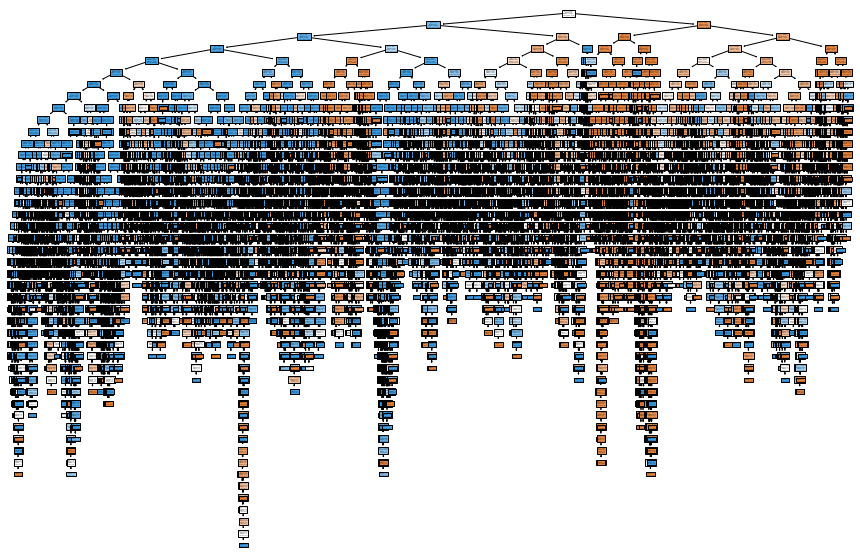

In [84]:
# Visualisation of tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

Over fitting probem in Decision Tree Classifier is visible here. So, we need to do some hyper parameter tuning for getting good accutacy in test data or a generalised model.

###### >> Hyperparameter tuning in decision Tree classifier for increading test accuracy and Avoid Over fitting problem

#### TREE PRUNING : 
1. For treating overfitting problem in Decisin tree classifier
2.  mainly checking the cc_alpa value in hyperparameter tuning

In [ ]:
###### Plot between train, test accuracy and ccp_alpha value (cost_complexity_pruning_path)

In [62]:
path = classifier.cost_complexity_pruning_path(X_train_smote,y_train_smote)
ccp_alphas, impurities = path.ccp_alphas,path.impurities
ccp_alphas
# for understanding the values
pd.DataFrame(ccp).T

,0,1,2,3,4,5,6,7,8,9,...,5733,5734,5735,5736,5737,5738,5739,5740,5741,5742
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005367,0.00539,0.00547,0.0067,0.006724,0.01762,0.025487,0.05069,0.070889,0.355226


In [ ]:
# def for plot creation
classifiers=[]
for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    classifier.fit(X_train_smote,y_train_smote)
    classifiers.append(classifier)

# plot 
train_scores = [classifier.score(X_train_smote,y_train_smote) for classifier in classifiers]
test_scores = [classifier.score(X_test,y_test) for classifier in classifiers]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title(" Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker ="o",label = 'train',drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker ="o",label = 'test',drawstyle="steps-post")
ax.legend()
plt.show()

### Model 19: Decision Tree with tuning ccp_alpha(Cost Complexity Pruning technique )

In [184]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(ccp_alpha=0.00006,max_features=None,criterion='gini',splitter='best',random_state=0)
classifier.fit(X_train_smote,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix is :')
print(cm)
print(' Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print(" ")
print(" ")

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm)
print('  Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[83146  5024]
 [ 4546 83624]]
 Model Accuracy in train dataset  is :  0.9457298400816604
 
 
confusion_matrix is :
[[20617  1323]
 [  743  7141]]
  Model Accuracy in test dataset  is :  0.9307269313304721


### Model 20: Random Forest after SMOTE

In [142]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,max_features='log2',ccp_alpha=0.00006,criterion = 'entropy',random_state=0)
classifier.fit(X_train_smote,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix is :')
print(cm)
print(' Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print(" ")
print(" ")

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm)
print('  Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[82753  5417]
 [ 5619 82551]]
 Model Accuracy in train dataset  is :  0.9374163547691958
 
 
confusion_matrix is :
[[20548  1392]
 [  808  7076]]
  Model Accuracy in test dataset  is :  0.9262339055793991


###### >> Random Forest have Overfitting problem

### Model 21 :Logistic Regressin after  SMOTE , then Feature Scaling

In [31]:
# standard Scalar ;
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_smote_std = X_train_smote
X_test_std  = X_test
X_train_smote_std.iloc[:,0:3] = sc.fit_transform(X_train_smote_std.iloc[:,0:3])
X_test_std.iloc[:,0:3] = sc.transform(X_test_std.iloc[:,0:3])

In [35]:
# save standar scalar data
X_train_smote_std.to_csv("X_train_smote_std.csv",encoding="utf-8")
X_test_std.to_csv("X_test_std.csv",encoding="utf-8")

In [51]:
# Fitting Logistic model on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_smote_std,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix is :')
print(cm)
print(' Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print(" ")
print(" ")

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm)
print('  Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[69359 18811]
 [14051 74119]]
 Model Accuracy in train dataset  is :  0.8136440966315073
 
 
confusion_matrix is :
[[17247  4693]
 [ 1682  6202]]
  Model Accuracy in test dataset  is :  0.7862459763948498


### Model 22: KNN (K = 2) after SMOTE , then Feature Scaling

In [52]:
# Fitting KNN model on training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_smote_std,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix is :')
print(cm)
print(' Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print(" ")
print(" ")

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm)
print('  Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[87972   198]
 [ 8330 79840]]
 Model Accuracy in train dataset  is :  0.9516388794374504
 
 
confusion_matrix is :
[[20835  1105]
 [ 1898  5986]]
  Model Accuracy in test dataset  is :  0.8993092811158798


### Model 23: KNN (K = 3) after SMOTE , then Feature Scaling

In [48]:
# Fitting KNN model on training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_smote_std,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix of train data is :')
print(cm)
print(' Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print(" ")
print(" ")
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix of test data is :')
print(cm)
print('  Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix of train data is :
[[83640  4530]
 [ 4358 83812]]
 Model Accuracy in train dataset  is :  0.9495973687195192
 
 
confusion_matrix of test data is :
[[20100  1840]
 [ 1101  6783]]
  Model Accuracy in test dataset  is :  0.9013881437768241


### Model 24 : KNN (K = 5) after SMOTE , then Feature Scaling

In [50]:
# Fitting KNN model on training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_smote_std,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix is :')
print(cm)
print(' Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print(" ")
print(" ")

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm)
print('  Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[82757  5413]
 [ 5538 82632]]
 Model Accuracy in train dataset  is :  0.9378983781331519
 
 
confusion_matrix is :
[[20161  1779]
 [ 1065  6819]]
  Model Accuracy in test dataset  is :  0.9046405579399142


### Model 25 : KNN (K =10) after SMOTE , then Feature Scaling

In [54]:
# Fitting KNN model on training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_smote_std,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix of train data is :')
print(cm)
print(' Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print(" ")
print(" ")
# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix of test data is :')
print(cm)
print('  Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix of train data is :
[[82748  5422]
 [ 7918 80252]]
 Model Accuracy in train dataset  is :  0.9243506861744357
 
 
confusion_matrix of test data is :
[[20340  1600]
 [ 1184  6700]]
  Model Accuracy in test dataset  is :  0.9066523605150214


### Model 26 : SVM with Linear Kernal After Standardscalar and SMOTE

In [198]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear",random_state=0)
classifier.fit(X_train_smote_std,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred = classifier.predict(X_train_smote_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_SVM = confusion_matrix(y_train_smote,y_pred)
print('confusion_matrix is :')
print(cm_SVM)
print('SVM Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred))


# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_SVM = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_SVM)
print('SVM Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[74210 13960]
 [14650 73520]]
SVM Model Accuracy in train dataset  is :  0.8377566065555178
confusion_matrix is :
[[18493  3447]
 [ 1680  6204]]
SVM Model Accuracy in test dataset  is :  0.8280914699570815


### Model 27 : Nive Bayes with Linear Kernal After Standardscalar and SMOTE

In [200]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_smote_std,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred = classifier.predict(X_train_smote_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train_smote,y_pred)
print('confusion_matrix is :')
print(cm)
print(' Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred))

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test_std)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm)
print(' Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[40182 47988]
 [ 9938 78232]]
 Model Accuracy in train dataset  is :  0.6715095837586481
confusion_matrix is :
[[10031 11909]
 [ 1209  6675]]
 Model Accuracy in test dataset  is :  0.5601528969957081



#### From these Models, I choose Model 17: XGBClassifier after the SMOTE is for deployment. because of this model gives high accuracy in test data , comape with other models. And its a generalised model too.

### Selected model:

In [210]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_smote,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_XGB = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix is :')
print(cm_XGB)
print('Gradient Boosting Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print("")
print("")

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_XGB = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_XGB)
print('Gradient Boosting Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[84151  4019]
 [ 3378 84792]]
Gradient Boosting Model Accuracy in train dataset  is :  0.9580526256096178


confusion_matrix is :
[[20856  1084]
 [  727  7157]]
Gradient Boosting Model Accuracy in test dataset  is :  0.9392770922746781


### Model 28: Trying to Increase the Accuracy of selected XGB model through parameter tuning;

In [267]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=6,subsample=1,colsample_bytree=1,min_child_weight=5,n_estimators=109,scale_pos_weight=2)
classifier.fit(X_train_smote,y_train_smote)

# predicting y_train data and checking train accuracy
y_pred_train = classifier.predict(X_train_smote)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_XGB = confusion_matrix(y_train_smote,y_pred_train)
print('confusion_matrix is :')
print(cm_XGB)
print('Gradient Boosting Model Accuracy in train dataset  is : ',accuracy_score(y_train_smote,y_pred_train))
print("")
print("")

# predicting y_test data and checking test accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_XGB = confusion_matrix(y_test,y_pred)
print('confusion_matrix is :')
print(cm_XGB)
print('Gradient Boosting Model Accuracy in test dataset  is : ',accuracy_score(y_test,y_pred))

confusion_matrix is :
[[82384  5786]
 [ 2285 85885]]
Gradient Boosting Model Accuracy in train dataset  is :  0.954230463876602


confusion_matrix is :
[[20391  1549]
 [  498  7386]]
Gradient Boosting Model Accuracy in test dataset  is :  0.9313640021459227


## Conclusion :
1. Based on the following confusion matrix of model, the accuracy of correct prediction of low risk is = 
(20391)/(20391+1549) *100 = 92.939%
2. Correct prediction of high risk is =
(7386)/(7386+498) *100 = 93.68 %
3. So, selecting Model 28 for deployment.

In [291]:
# Concatong the test and train data
train = pd.concat([X_train,y_train],axis=1,ignore_index=False)
test = pd.concat([X_test,y_test],axis=1,ignore_index=False)
bank_final_model = pd.concat([train,test],axis=0,ignore_index=True)
print (bank_final_model.shape)
# saving bank_final_model
bank_final_model.to_csv('bank_final_model.csv',encoding= 'utf-8')

(149118, 10)

## Chapter 3: Model.pkl file Creation and app.py making for Deployment

### 3.1 Running the model in whole  bank_final_model data

In [304]:
import numpy as np
import pandas as pd
import pickle

from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=6,subsample=1,colsample_bytree=1,min_child_weight=5,n_estimators=109,scale_pos_weight=2)

In [305]:
# fitting the model bank_final_model dataset
classifier.fit(bank_final_model.iloc[:,:-1],bank_final_model.iloc[:,-1:])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=109, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [306]:
# Checking overall Accuracy
y_pred = classifier.predict(bank_final_model.iloc[:,:-1])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(bank_final_model.iloc[:,-1:],y_pred)
print('confusion_matrix of final Model is :')
print(cm)
print('Gradient Boosting Final Model Accuracy is : ',accuracy_score(bank_final_model.iloc[:,-1:],y_pred))

confusion_matrix of final Model is :
[[104642   5468]
 [  2547  36461]]
Gradient Boosting Final Model Accuracy is :  0.9462506203141137


In [307]:
# Saving model to disk as model.pkl
import pickle
pickle.dump(classifier,open('model.pkl','wb'))